In [7]:
# Se incorporan librerias para analisis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Se extraen datos de excel 
df = pd.read_excel('Calculo perdidas costo fabril - ENEA.xlsx',sheet_name='Muestras_planta')
df.columns

Index(['Nombre MP', 'Peso tara', 'Peso bruto', 'Utensilio', 'Peso perdida',
       'Cantidad', 'Medicion', 'Perdida teorica', '% Error', '% Desv',
       '% Complem', '% Tot', 'Muestreo '],
      dtype='object')

In [22]:
# se crea una tabla dinamica con el dato peso perdida por MP y Utensilio
pd.pivot_table(df,values='Peso perdida',index=['Nombre MP','Utensilio'],aggfunc=np.mean)

Peso perdida
Nombre MP         Utensilio                              
Batido yogurth    Bacha rectangular grande       0.080429
                  Bolo pequeño                   0.700000
                  Globo yogurth                  1.251429
Brillo frio       Bacha rectangular grande       0.294750
                  Bacha rectangular pequeña      0.021000
...                                                   ...
Relleno pie limon Bacha rectangular pequeña      0.017000
                  Balde 4,5 kg                   0.063500
                  Dosificador unifiller          1.169000
                  Tolva unifiller                0.180000
Remojo            Remojo gorreri                22.687000

[172 rows x 1 columns]

In [9]:
# Se crean los objetos para crear graficos 
class Grafico:
    
    def __init__(self,df: object, utensilio: str, nombre_mp: str):
        self.df = df
        self.utensilio = utensilio
        self.nombre_mp = nombre_mp
        self.data = self.df[(self.df['Utensilio'] == self.utensilio)&(self.df['Nombre MP'] == self.nombre_mp)]
        self.pp = self.data['Peso perdida']
        self.pt = self.data['Perdida teorica']
        self.dif = self.data['Muestreo ']
        
    def graficar(self):
        datos = 'Cantidad de muestras: '+str(len(self.pp))+' - '+'Min: '+str(round(np.min(self.pp),3))+' kg'+' - '+'Max: '+str(round(np.max(self.pp),3))+' kg'
        fig, ax = plt.subplots(figsize=(10,7))
        sns.scatterplot(x=self.pp,y=self.pp.index,alpha=0.7,hue=self.dif)
        ax.axvline(x=np.mean(self.pp),color='red',linestyle='--',label='Promedio real '+str(round(np.mean(self.pp)*1000,0))+' gr')
        ax.axvline(x=np.mean(self.pt),color='green',linestyle='--',label='Peso teorico '+str(round(np.mean(self.pt)*1000,0))+' gr')
        ax.set_title(str(self.nombre_mp)+' - '+str(self.utensilio)+'\n'+str(datos),size=16)
        ax.set_xlabel('kg',size=18)
        ax.set_ylabel('Muestras',size=18)
        ax.legend()
        ax.grid()

class Grafico_hist(Grafico):

    def graficar_hist(self):
        fig, ax = plt.subplots()
        sns.histplot(self.pp,bins=80,alpha=0.7)
        ax.axvline(x=np.mean(self.pp),color='red',linestyle='--',label='Promedio real '+str(round(np.mean(self.pp)*1000,0))+' gr')
        ax.axvline(x=np.mean(self.pt),color='green',linestyle='--',label='Peso teorico '+str(round(np.mean(self.pt)*1000,0))+' gr')
        ax.set_title(str(self.nombre_mp)+' - '+str(self.utensilio),size=16)
        ax.set_xlabel('kg',size=18)
        ax.set_ylabel('Frecuencia',size=18)
        ax.legend()
        ax.grid()

class Grafico_lineal(Grafico):

     def graficar_lin(self):
        fig, ax = plt.subplots()
        sns.lineplot(x=self.pp.index,y=self.pp)
        ax.axhline(y=np.mean(self.pp),color='red',linestyle='--',label='Promedio real '+str(round(np.mean(self.pp)*1000,0))+' gr')
        ax.axhline(y=np.mean(self.pt),color='green',linestyle='--',label='Peso teorico '+str(round(np.mean(self.pt)*1000,0))+' gr')
        ax.set_title(str(self.nombre_mp)+' - '+str(self.utensilio),size=16)
        ax.set_xlabel('Muestras',size=18)
        ax.set_ylabel('kg',size=18)
        ax.legend()
        ax.grid()

In [4]:
# Se crea una nueva variable para control de ingresos validos
df['Llave'] = df['Nombre MP']+df['Utensilio']
llave = df['Llave'].drop_duplicates()
utensilio = df['Utensilio'].drop_duplicates()
materia_prima = df['Nombre MP'].drop_duplicates()

C:\Users\dsaldias\AppData\Local\Temp\ipykernel_29116\2785568705.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10,7))


172


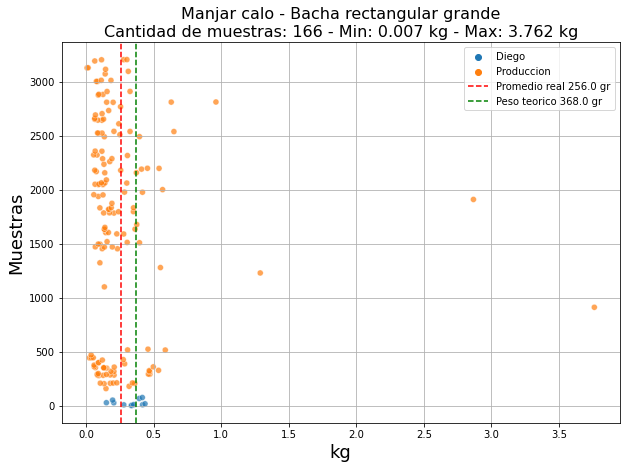

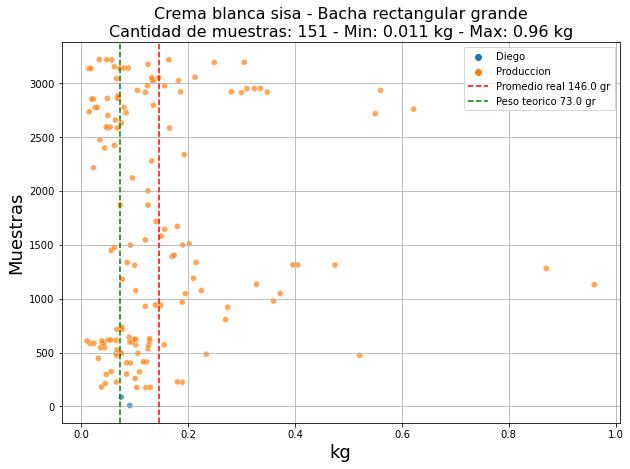

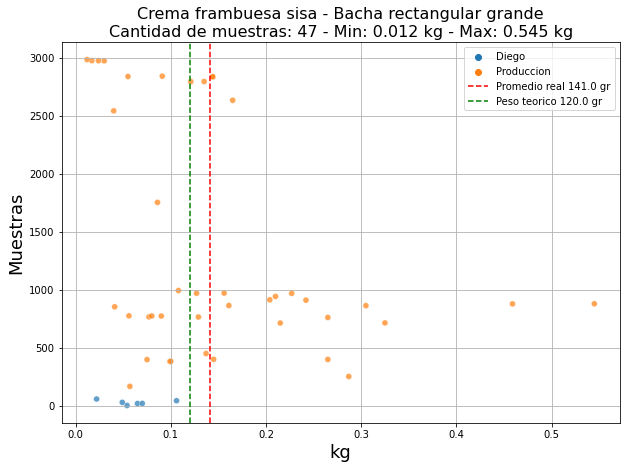

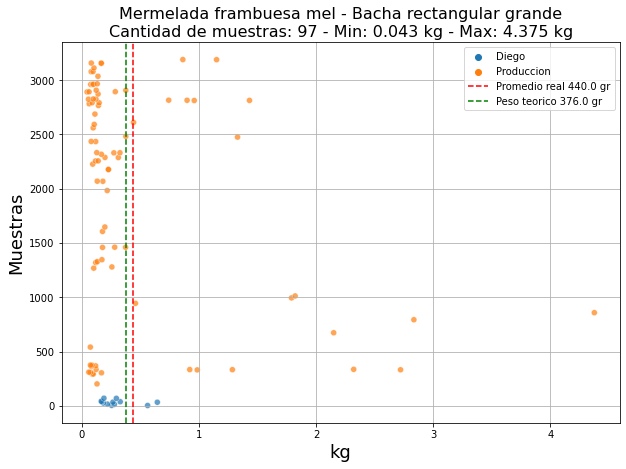

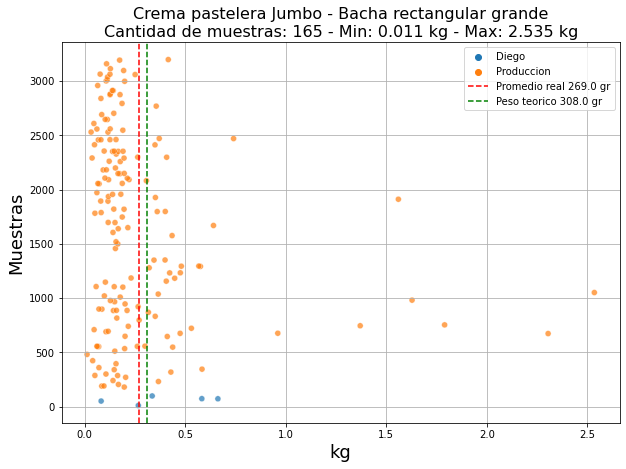

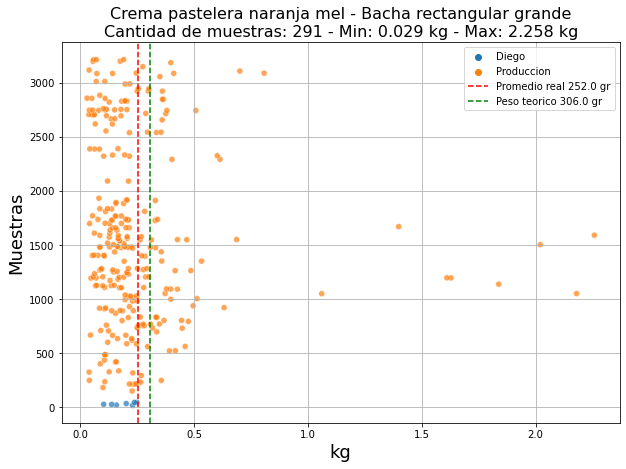

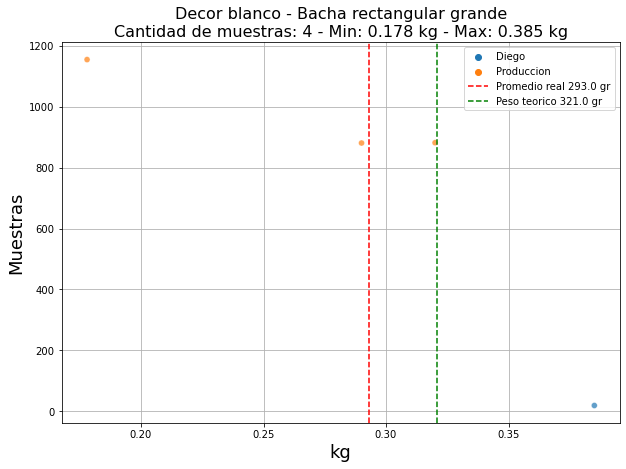

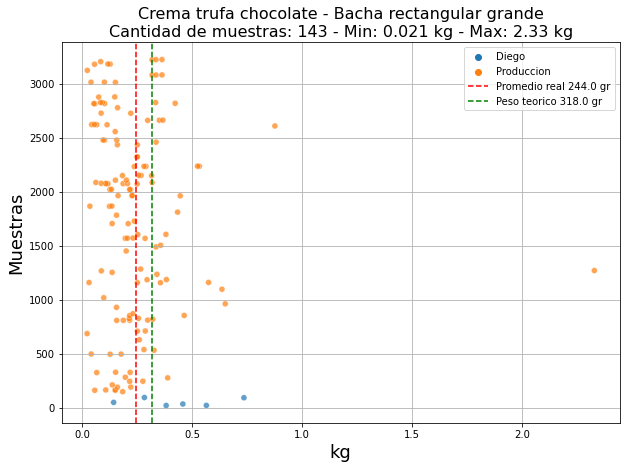

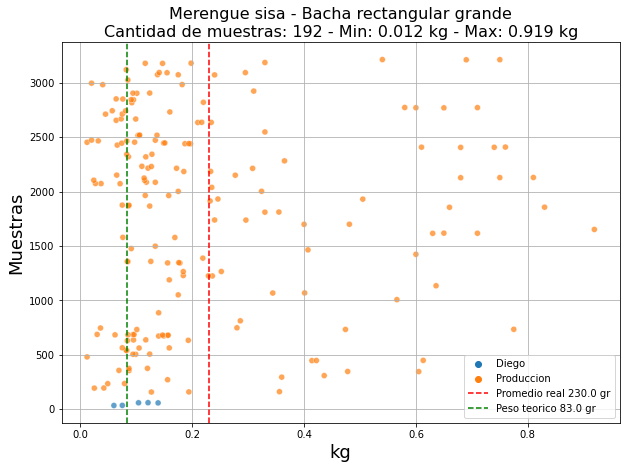

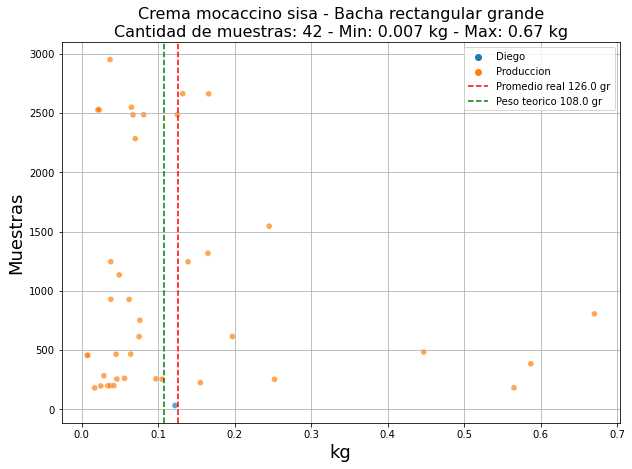

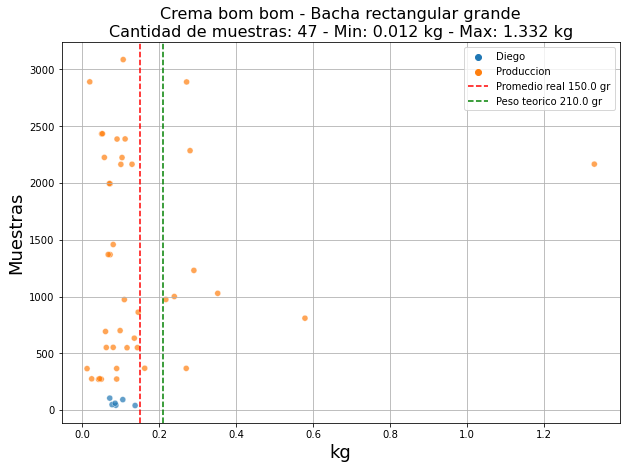

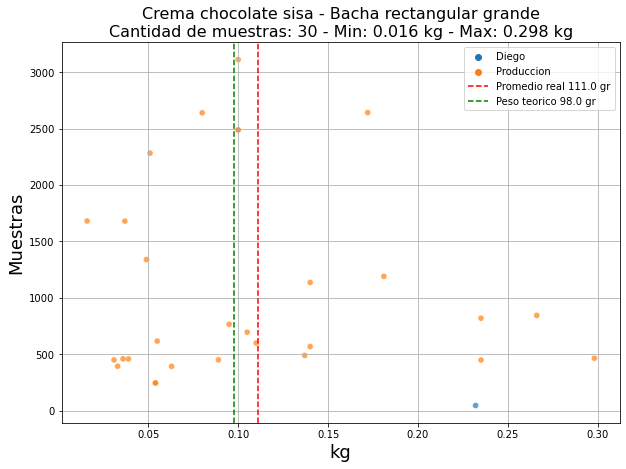

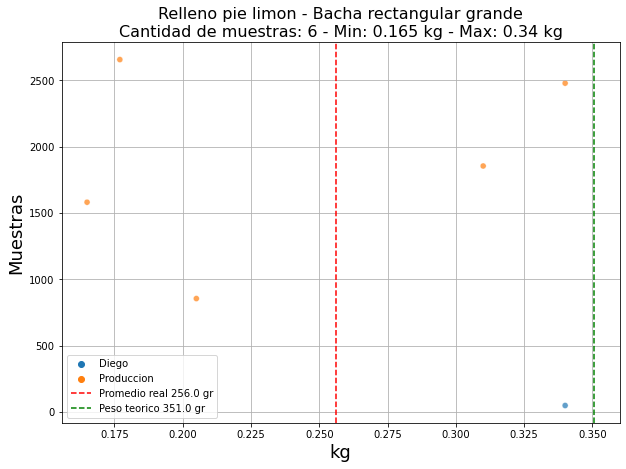

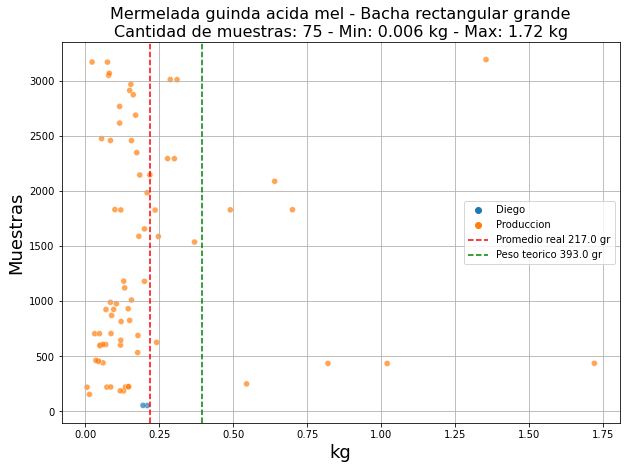

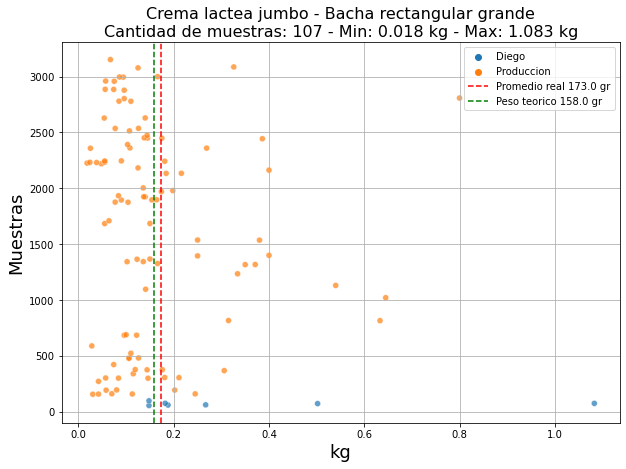

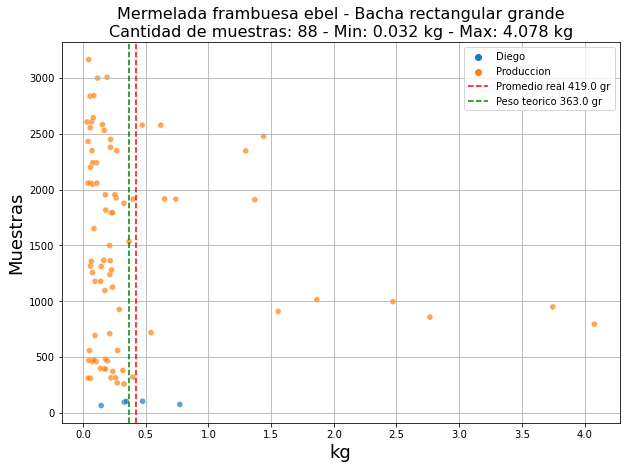

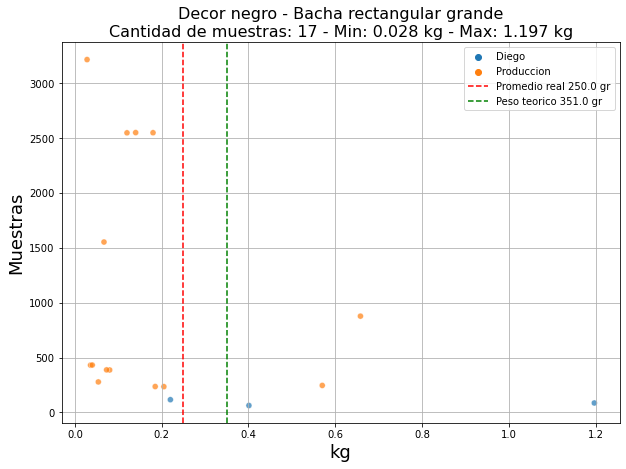

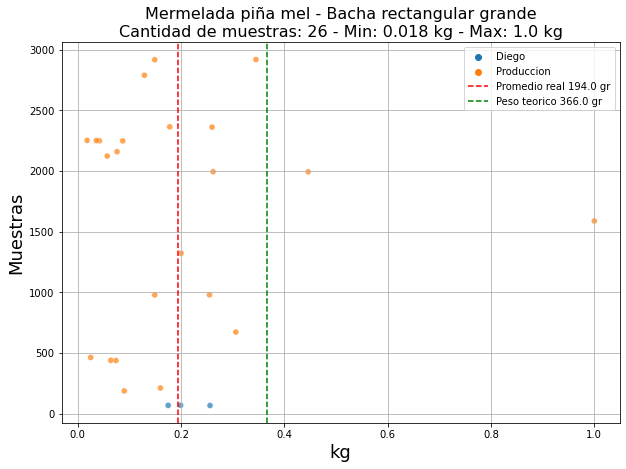

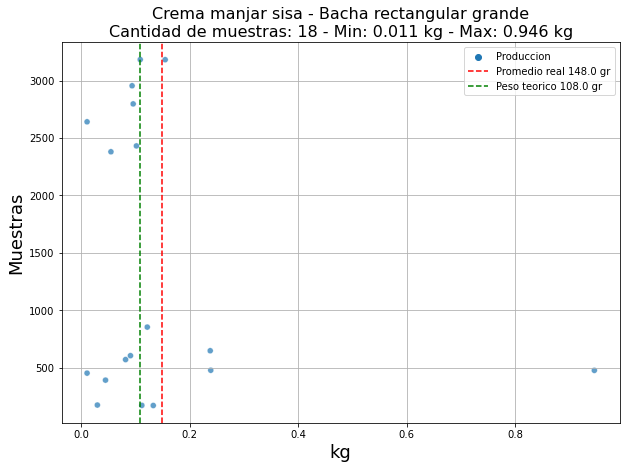

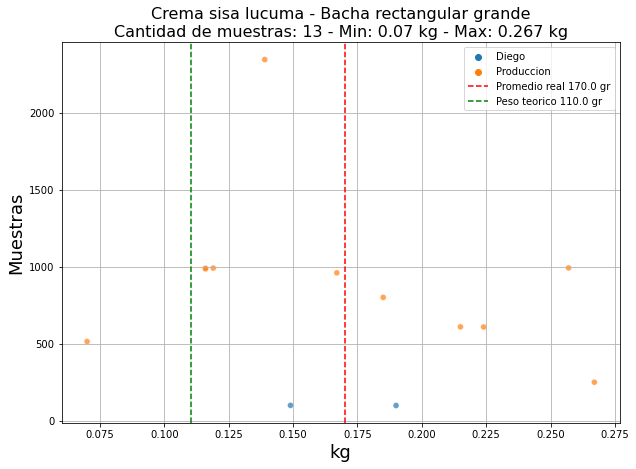

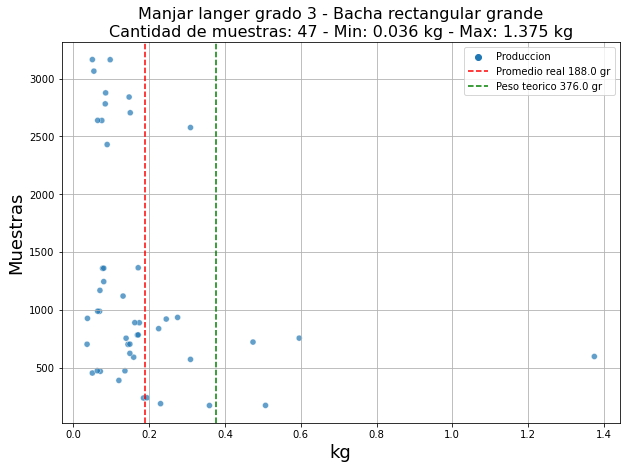

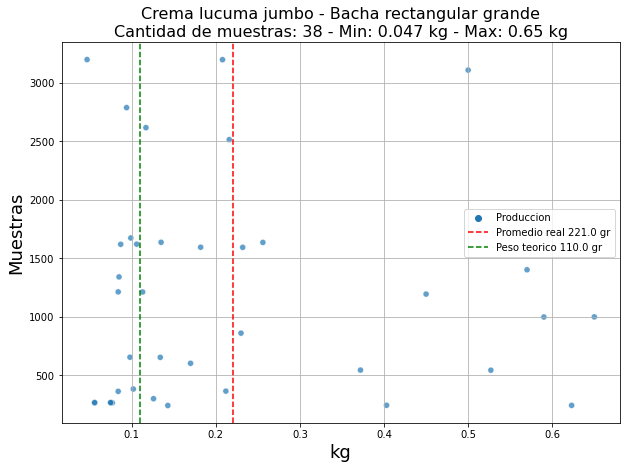

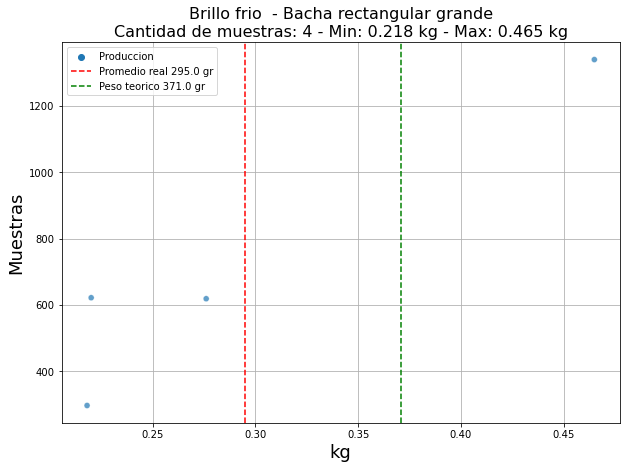

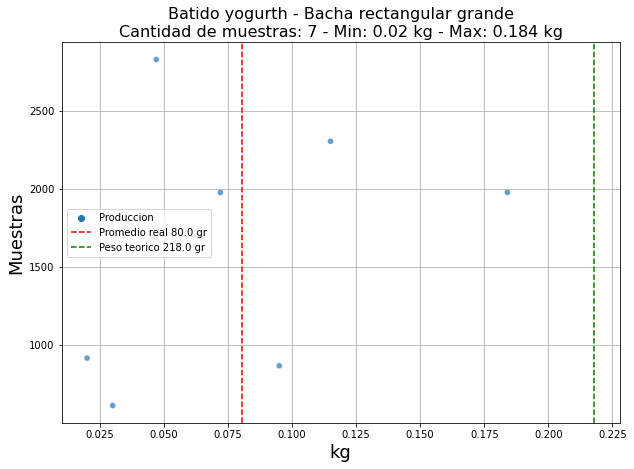

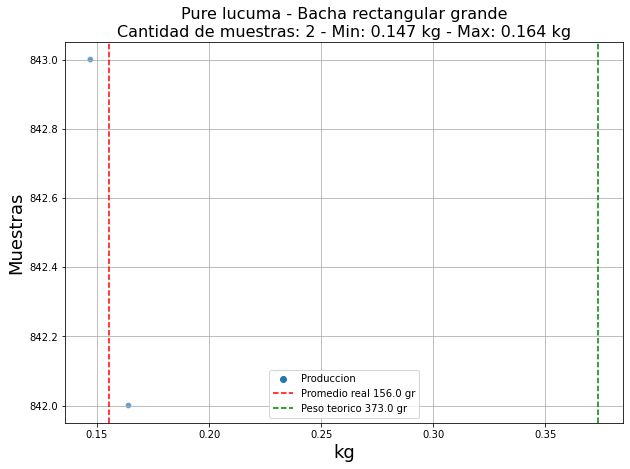

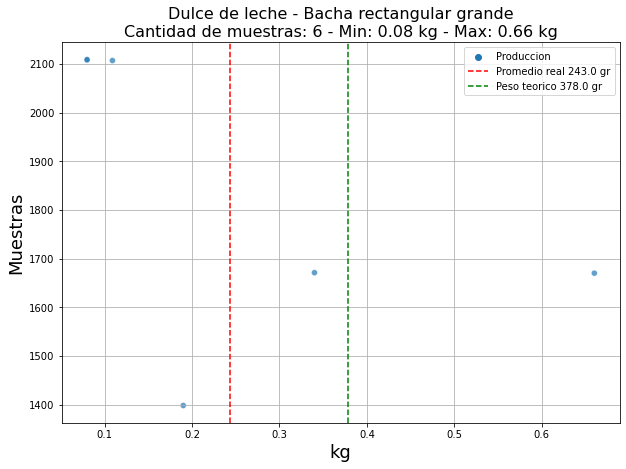

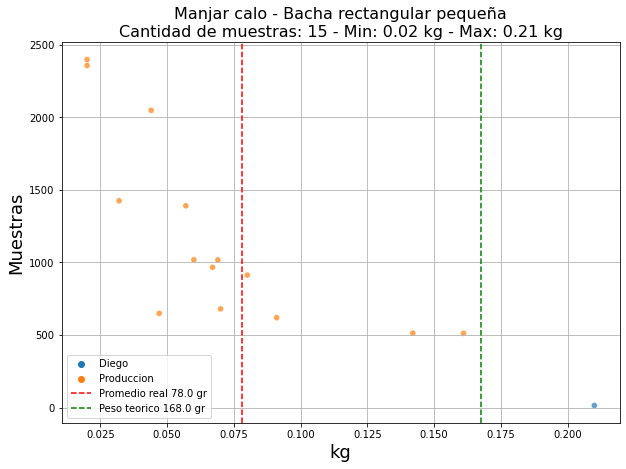

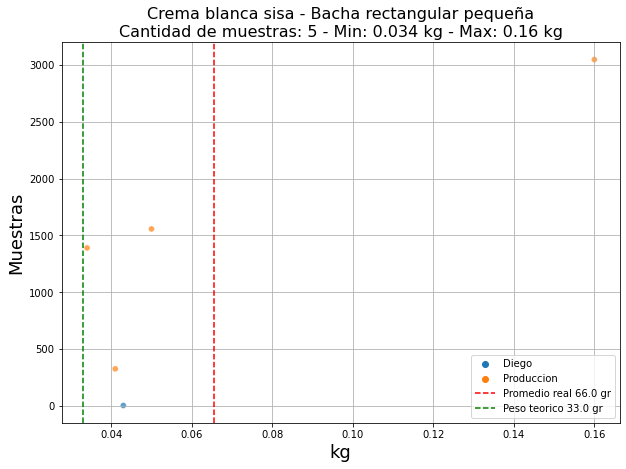

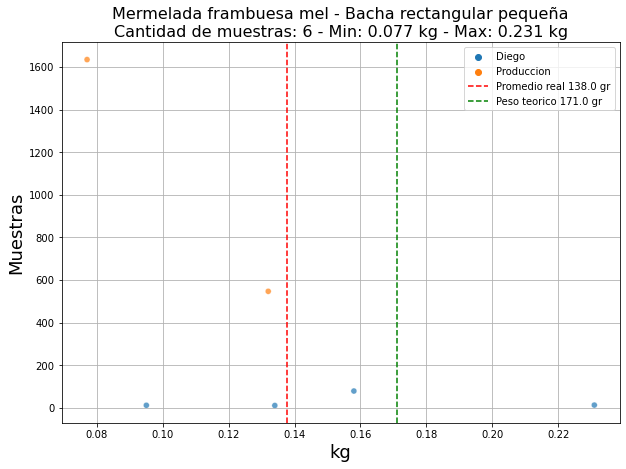

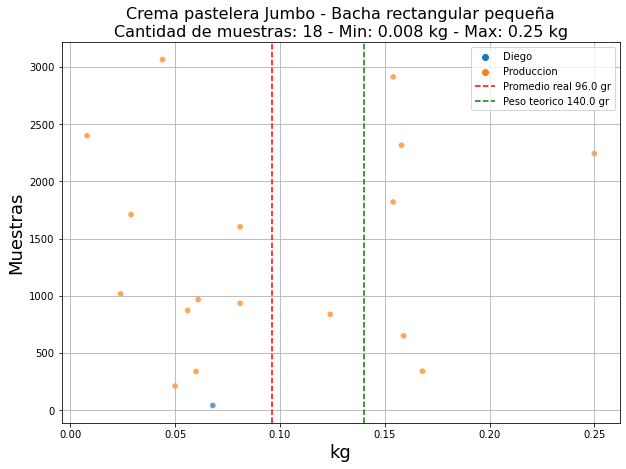

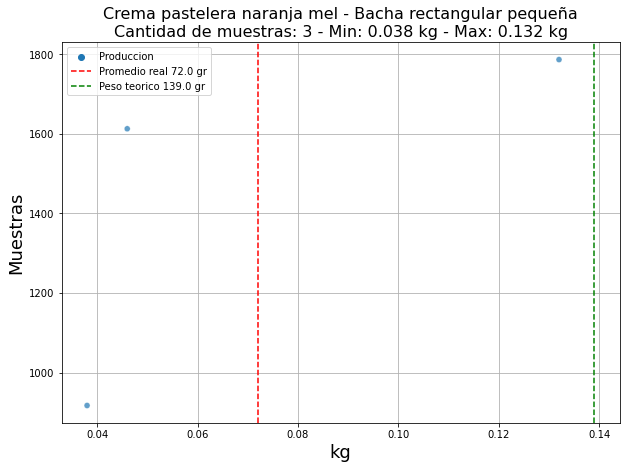

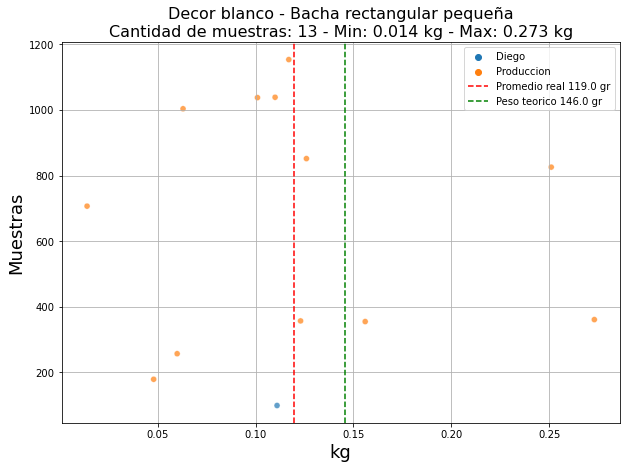

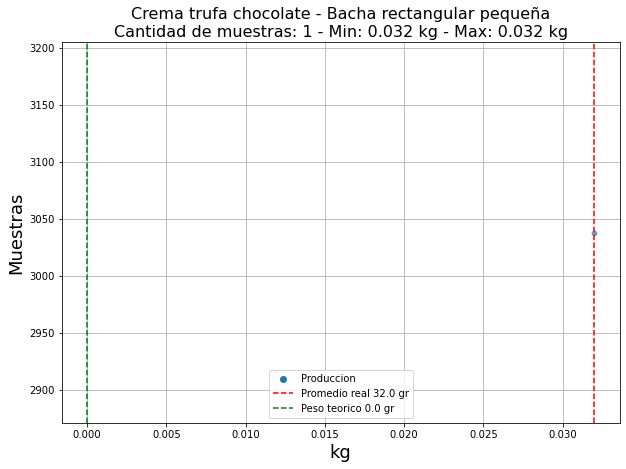

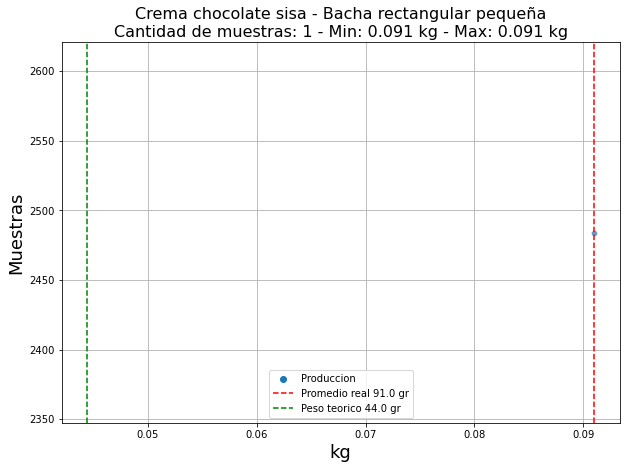

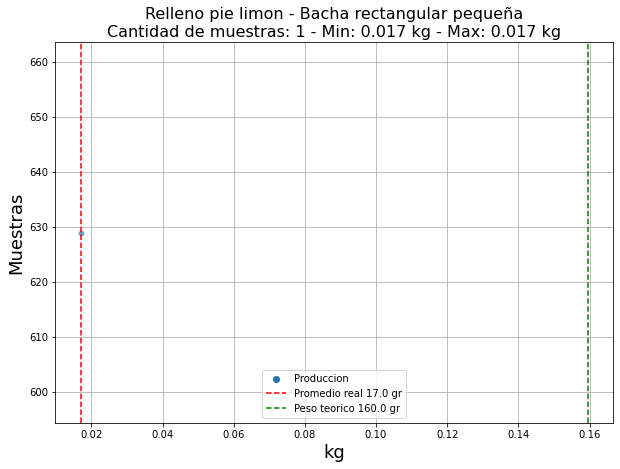

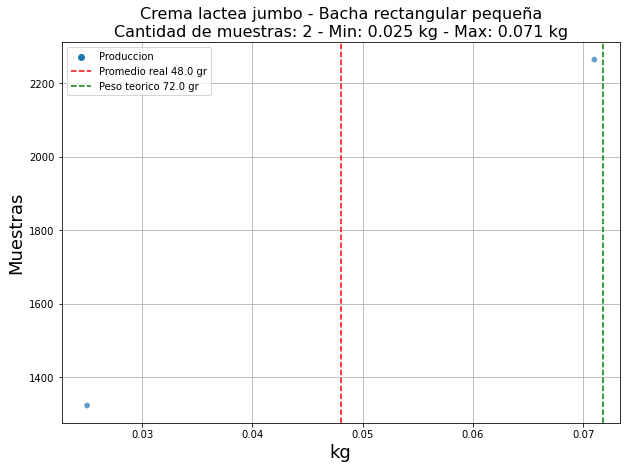

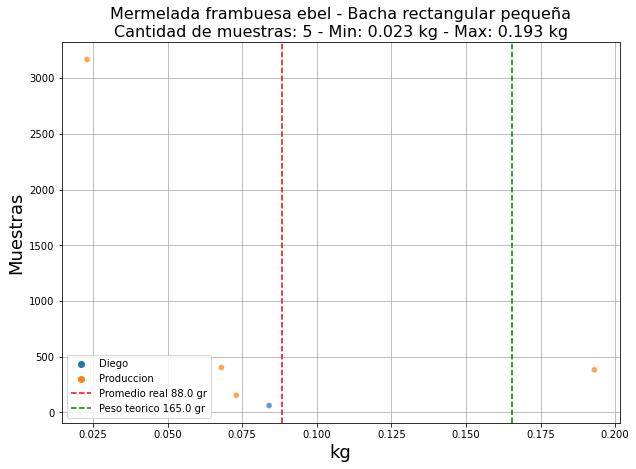

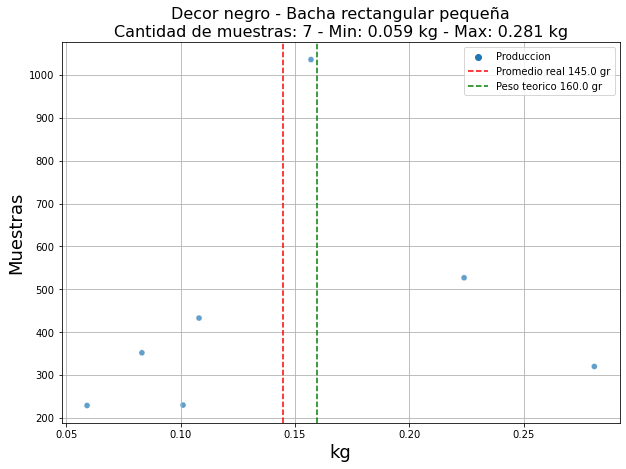

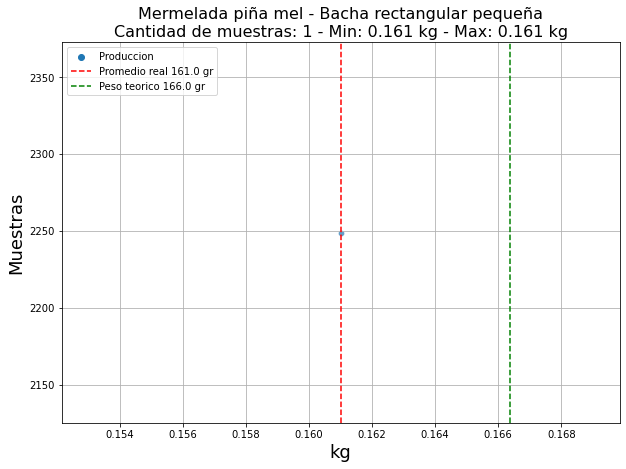

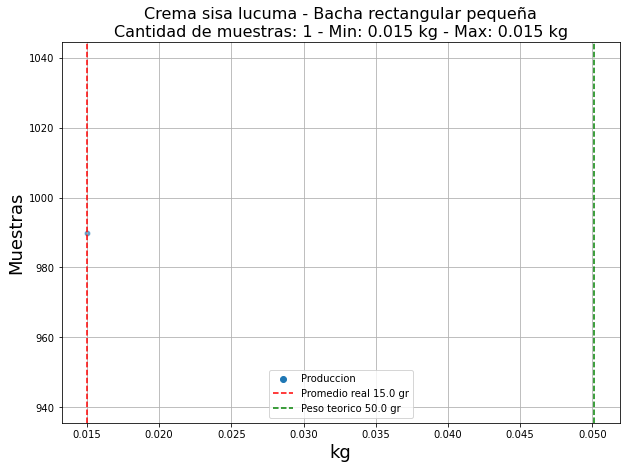

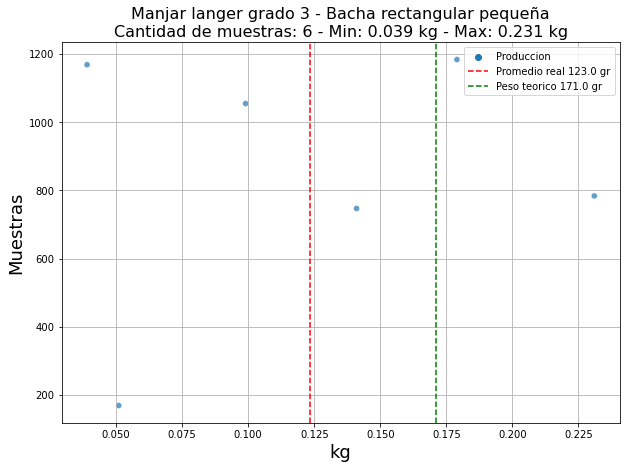

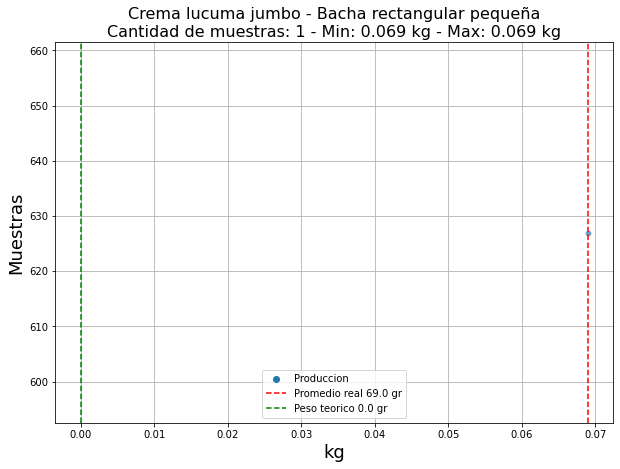

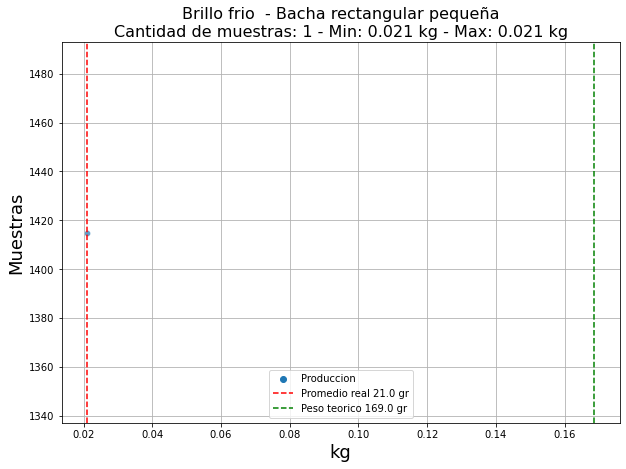

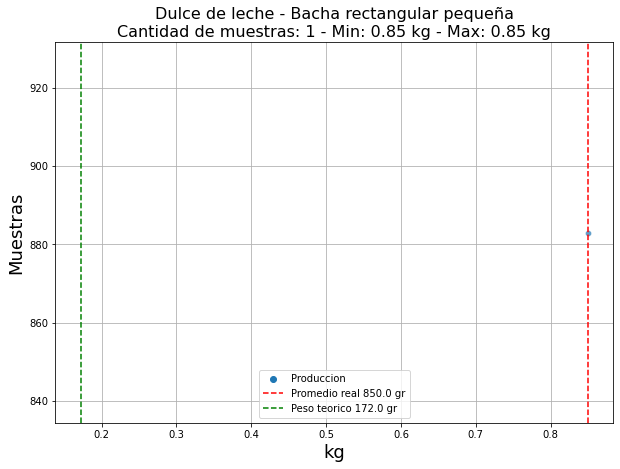

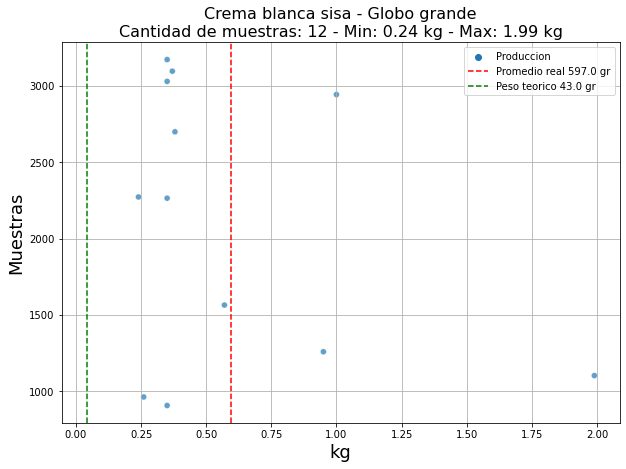

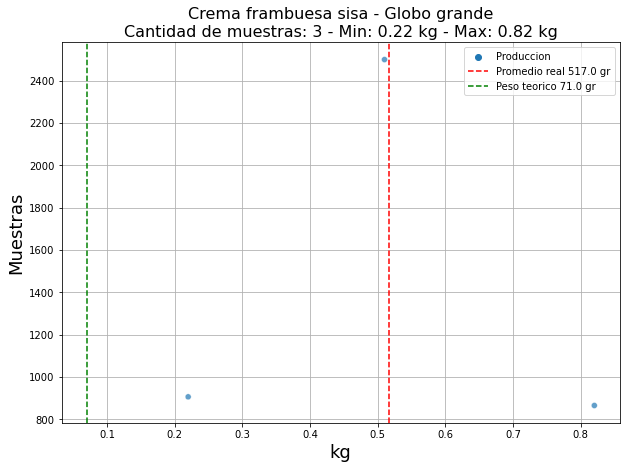

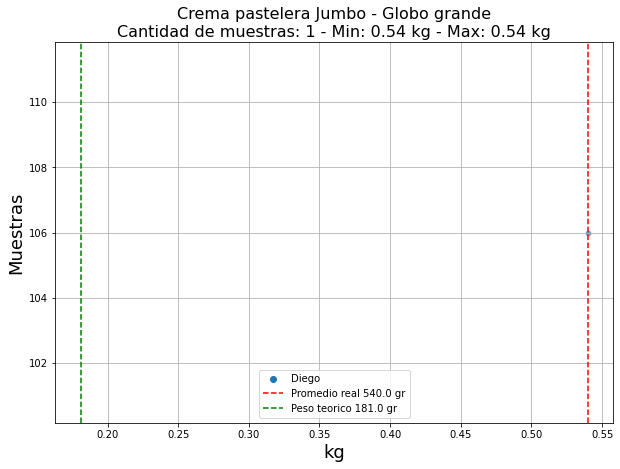

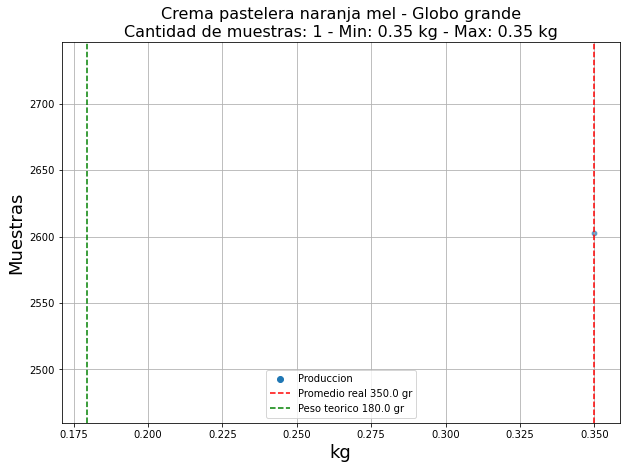

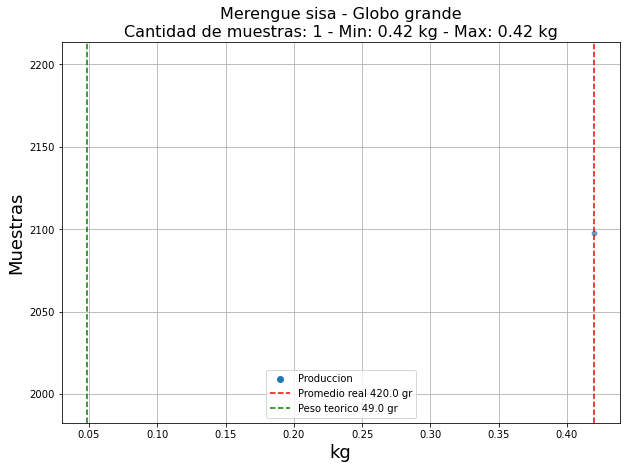

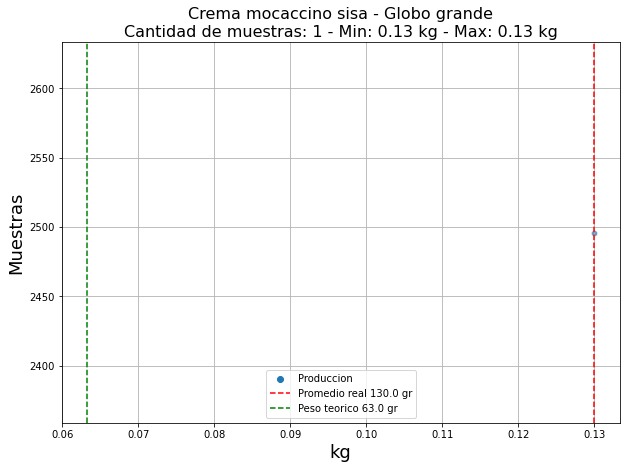

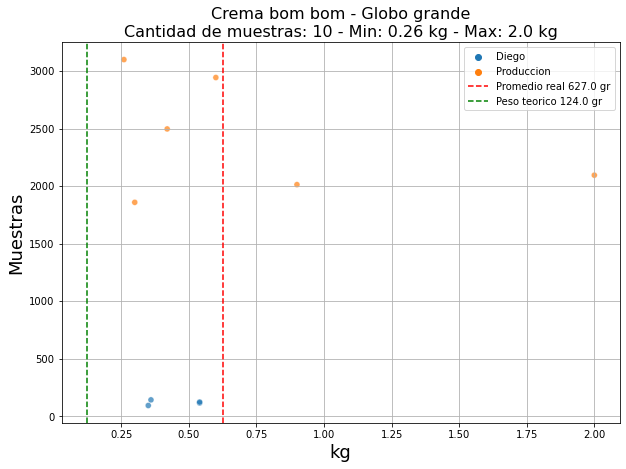

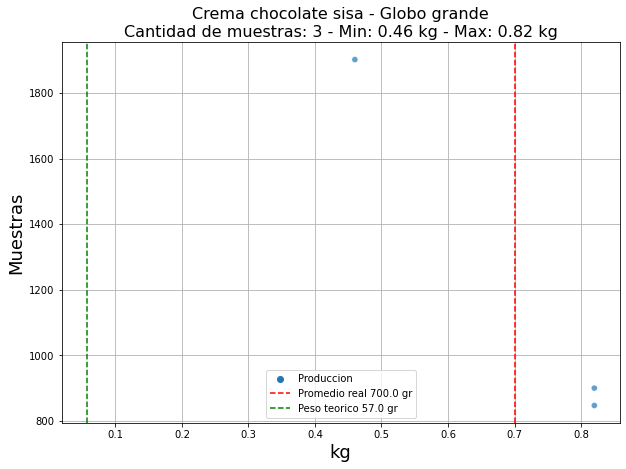

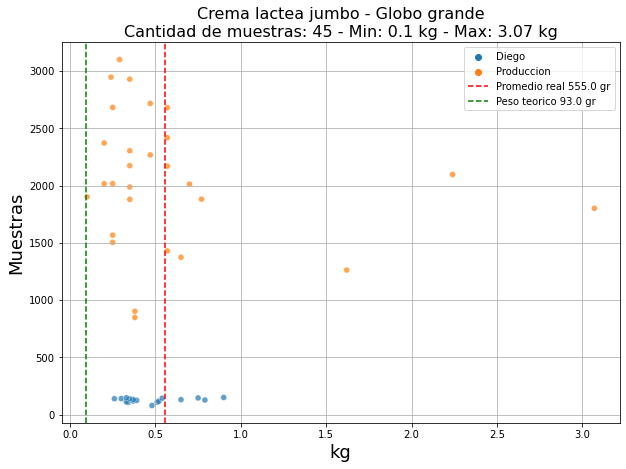

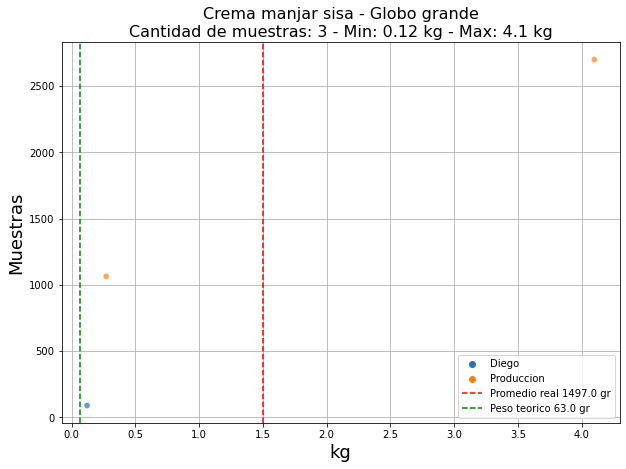

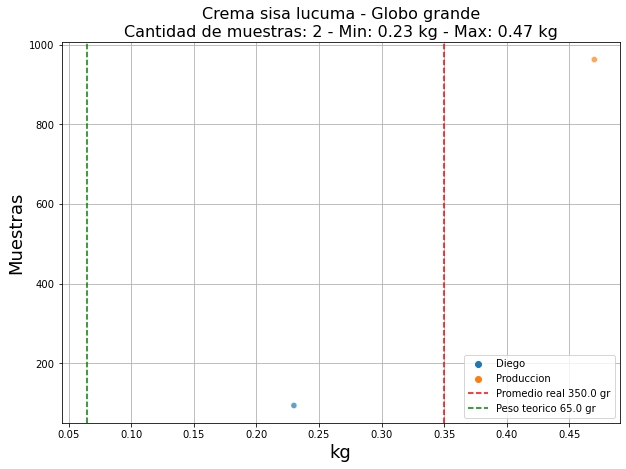

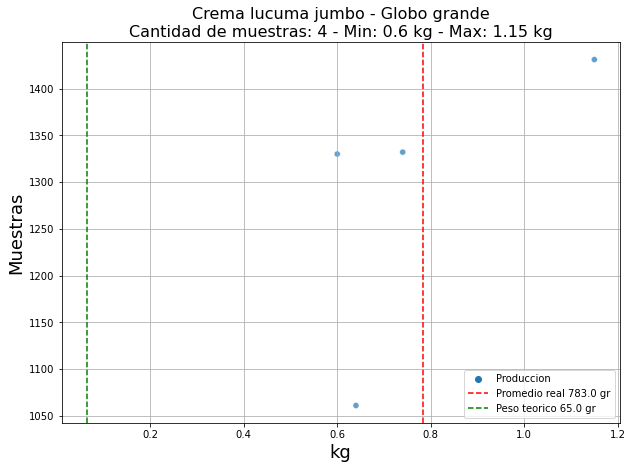

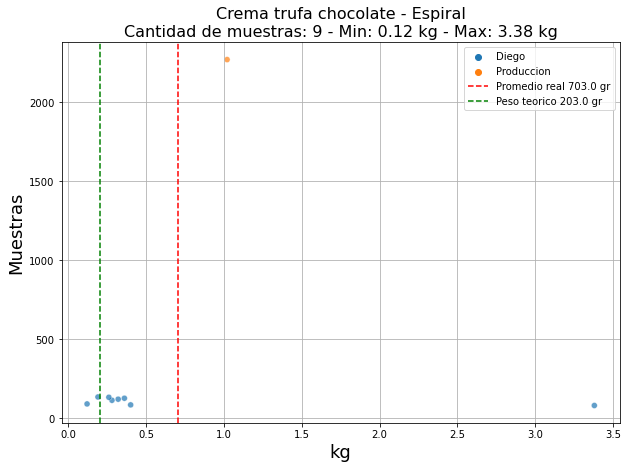

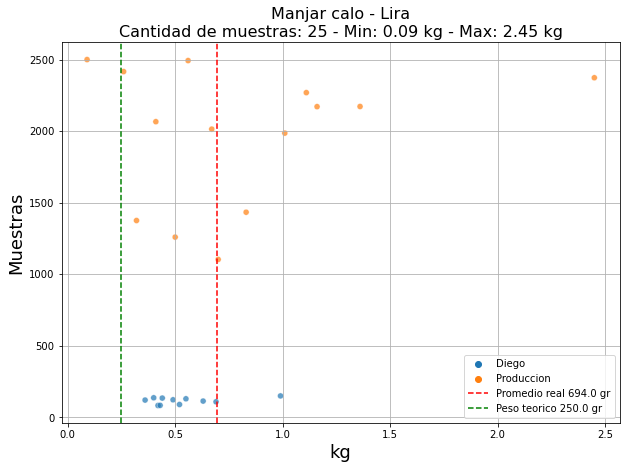

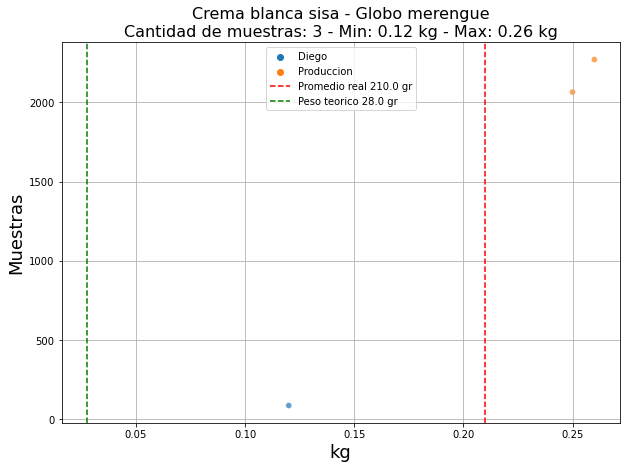

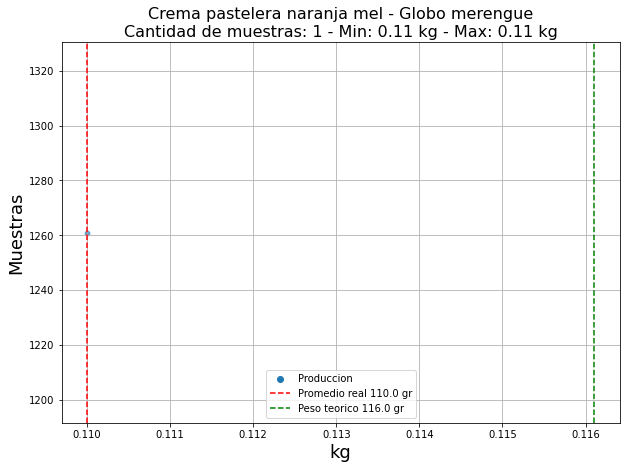

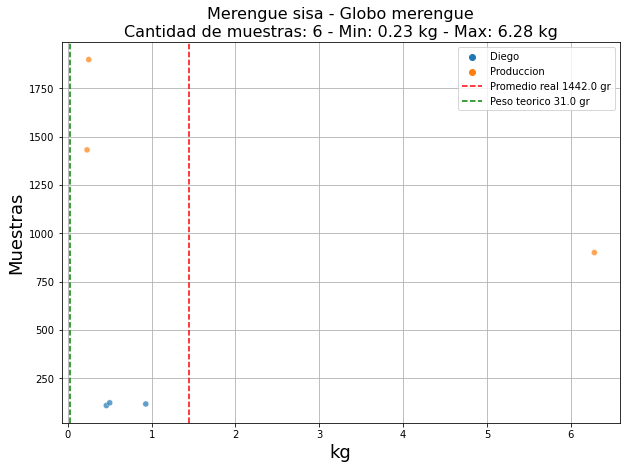

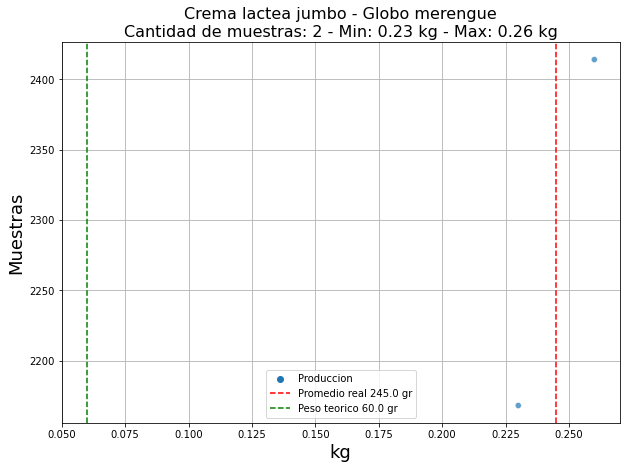

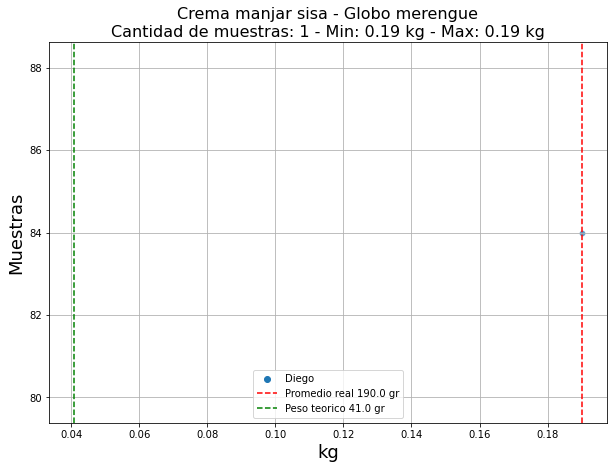

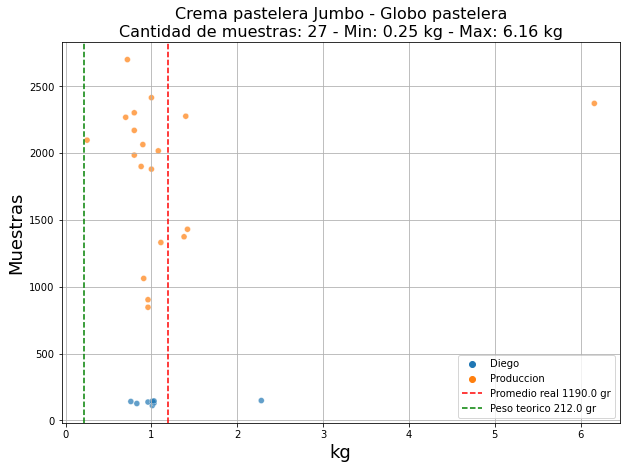

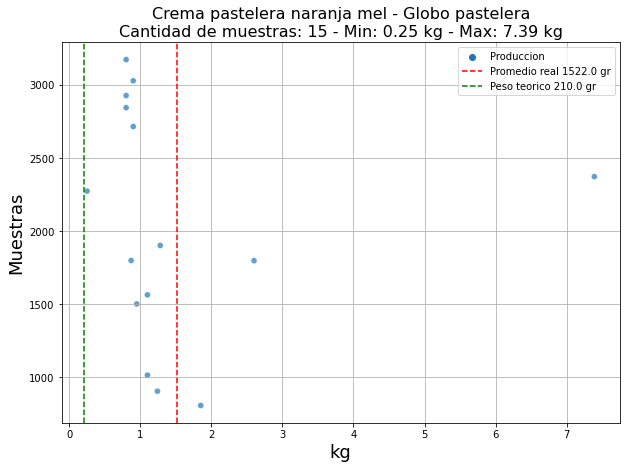

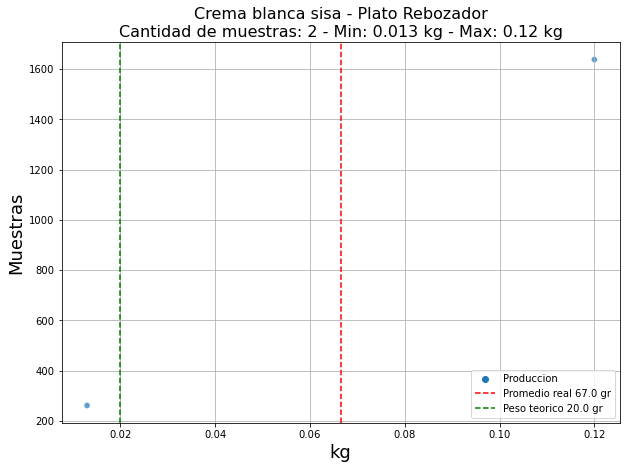

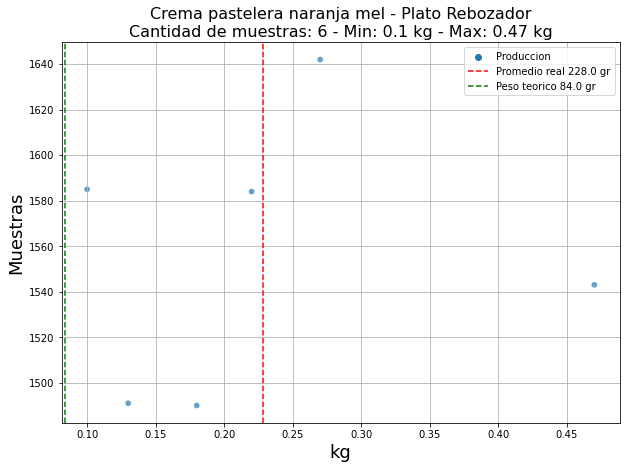

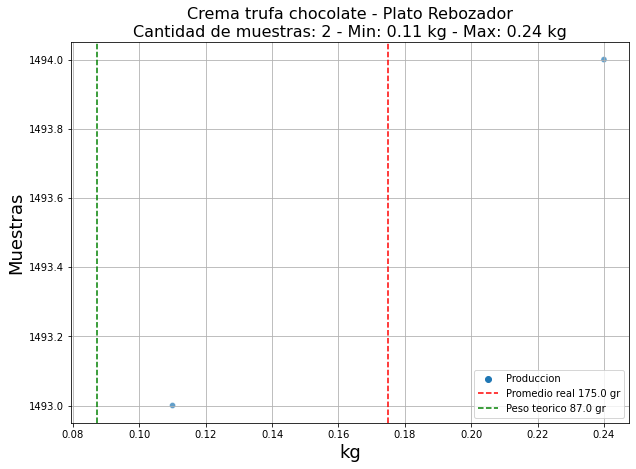

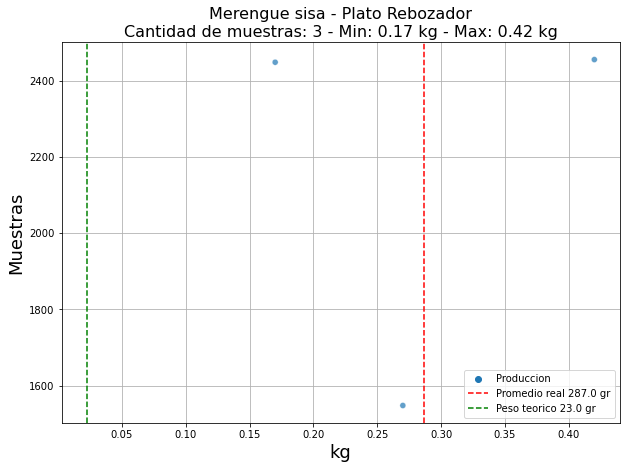

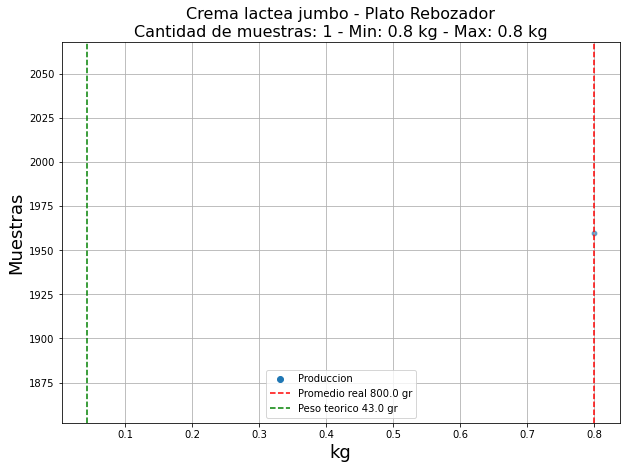

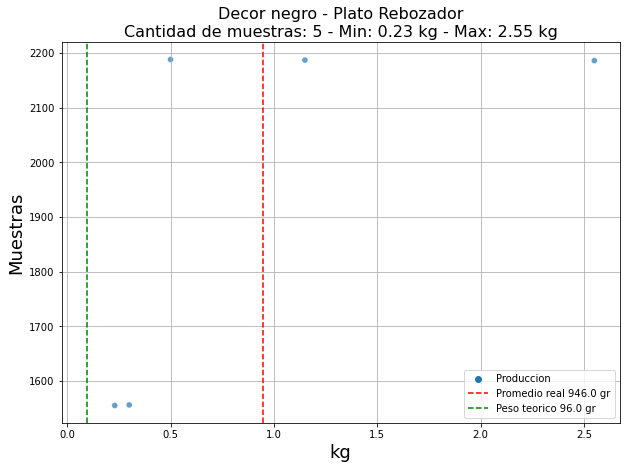

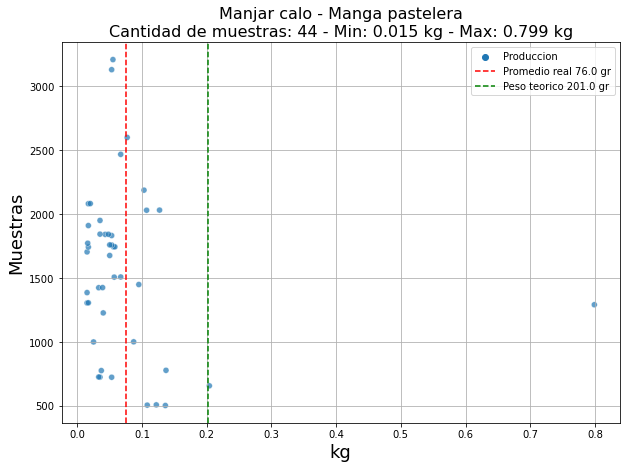

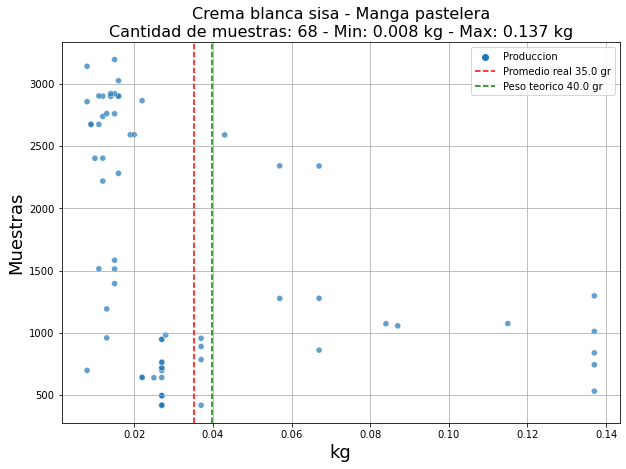

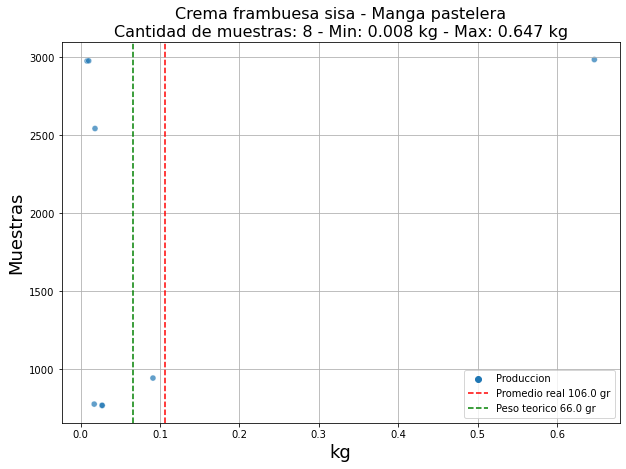

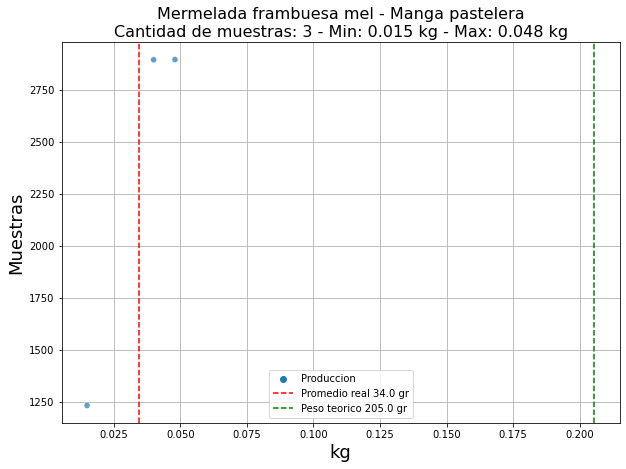

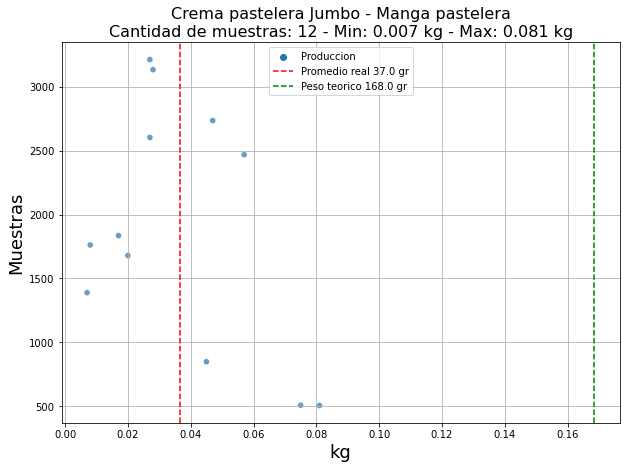

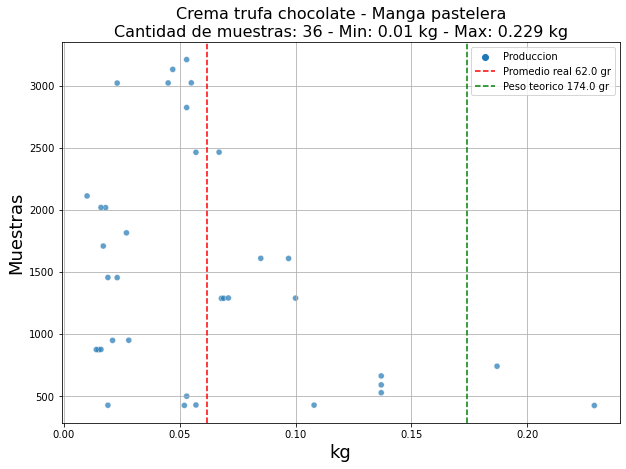

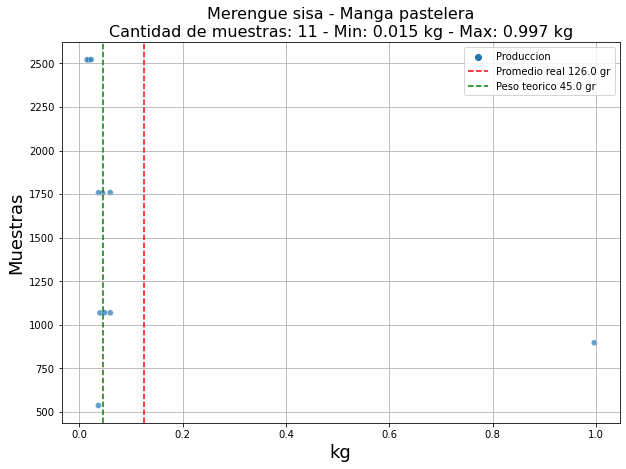

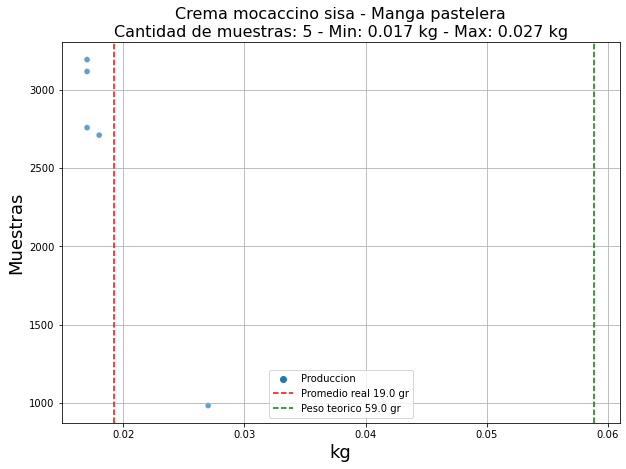

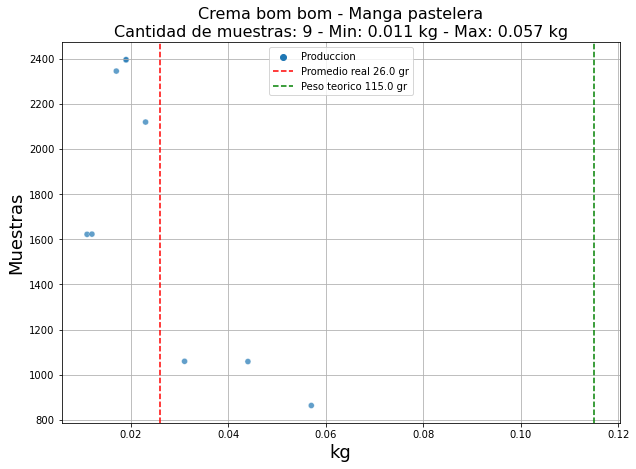

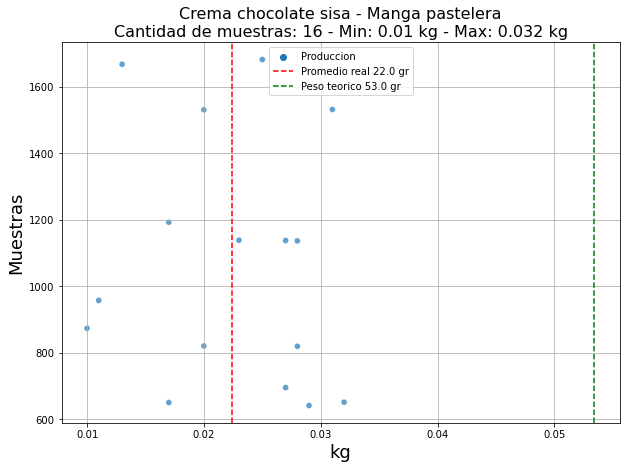

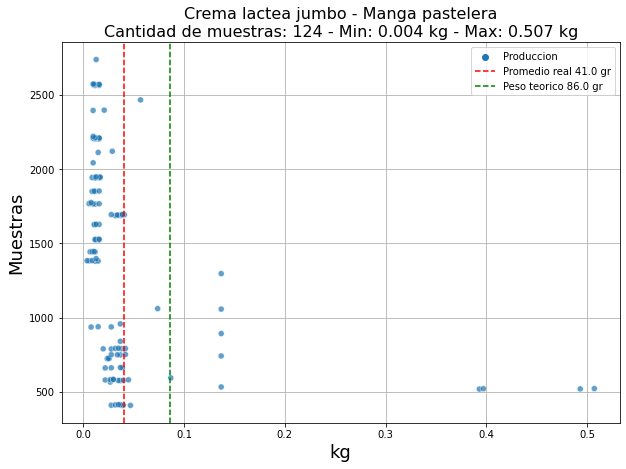

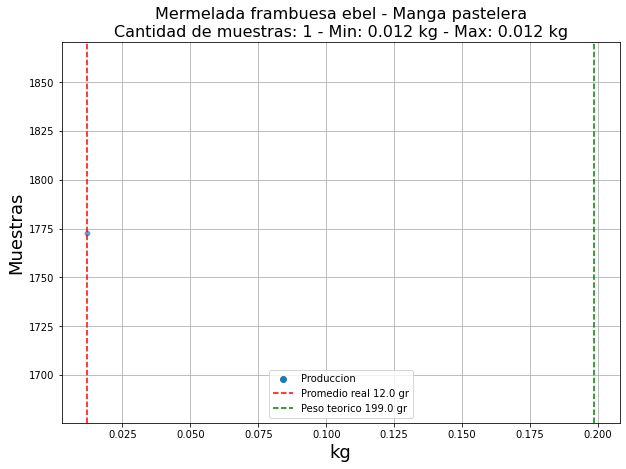

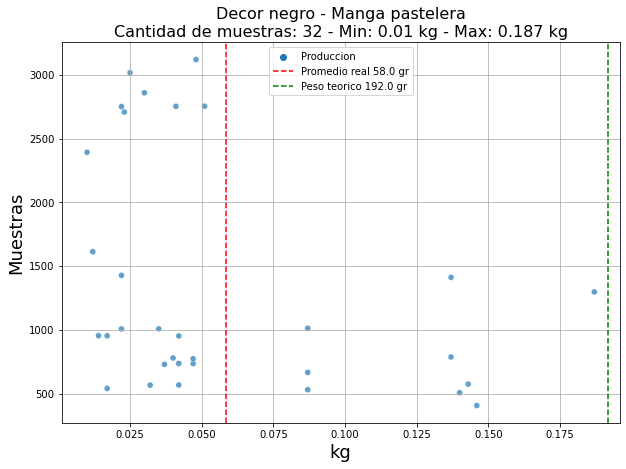

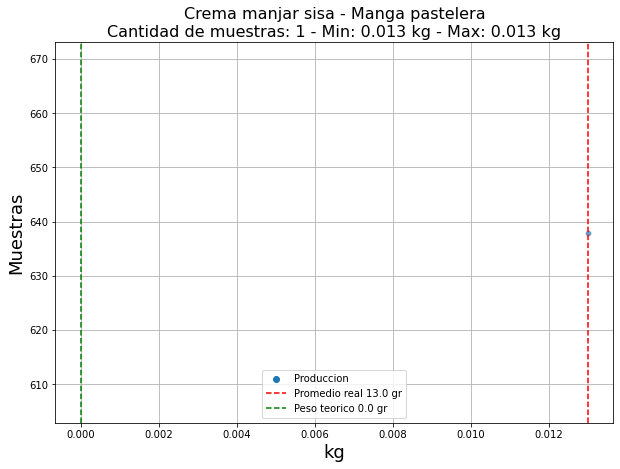

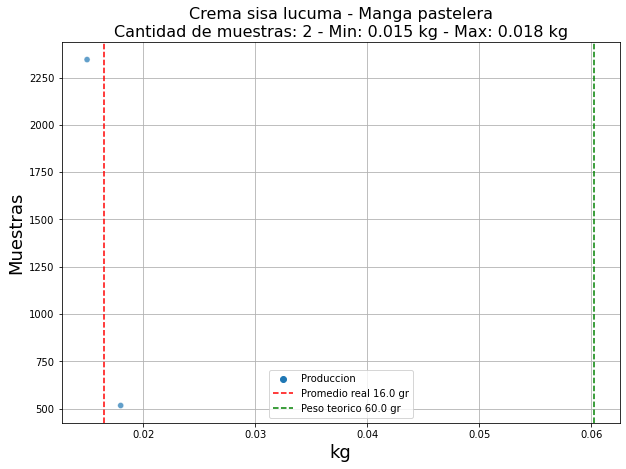

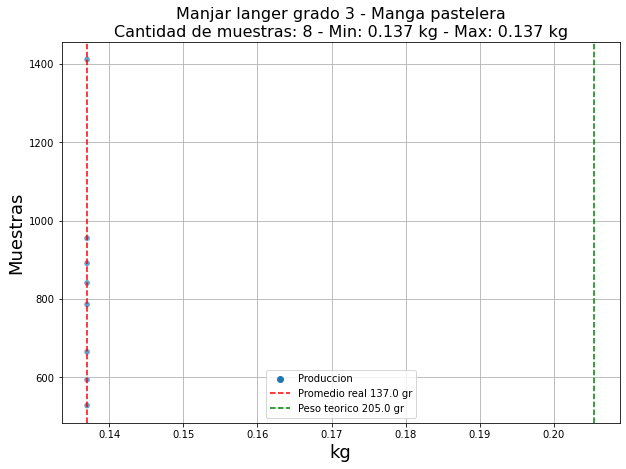

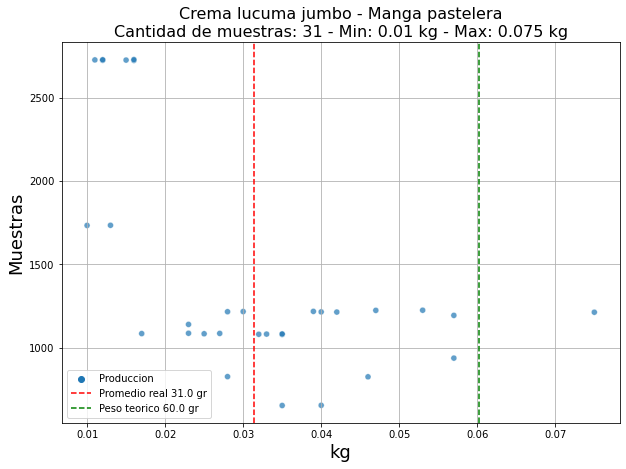

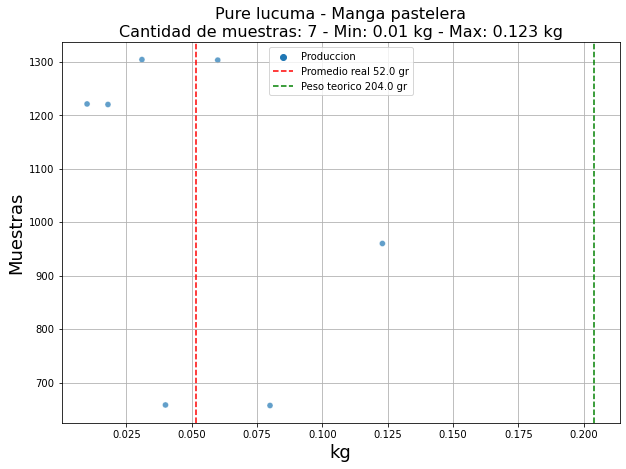

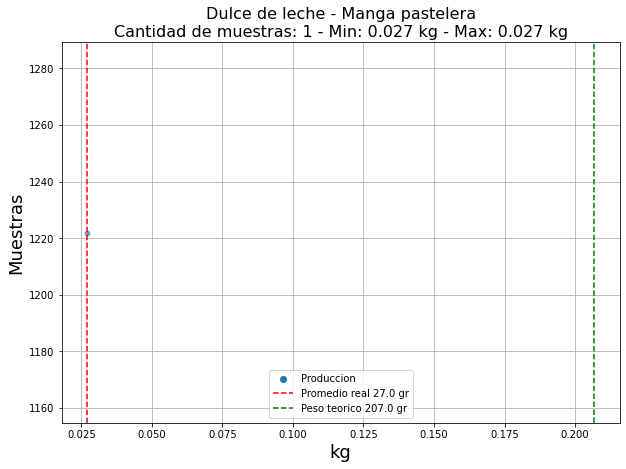

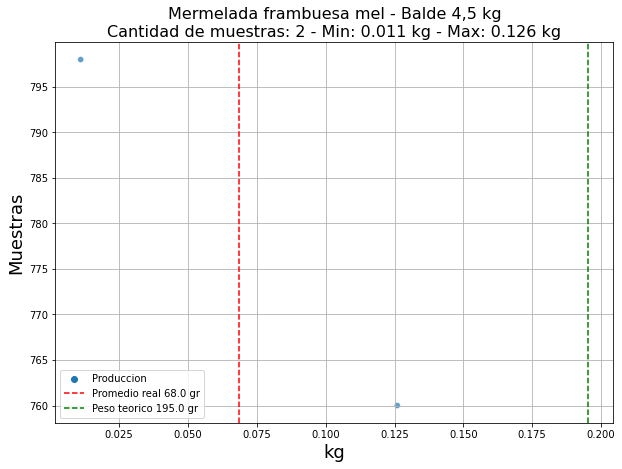

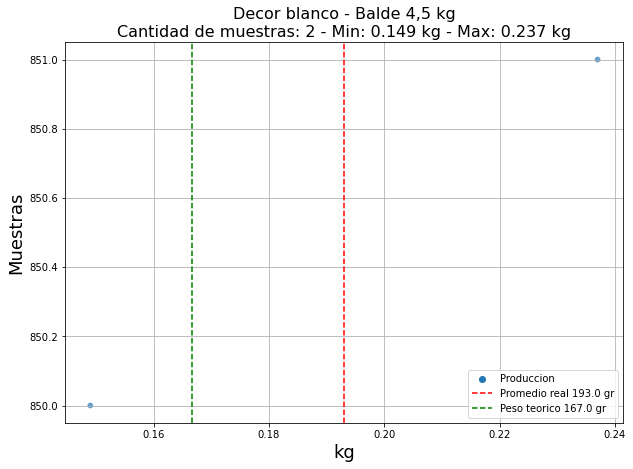

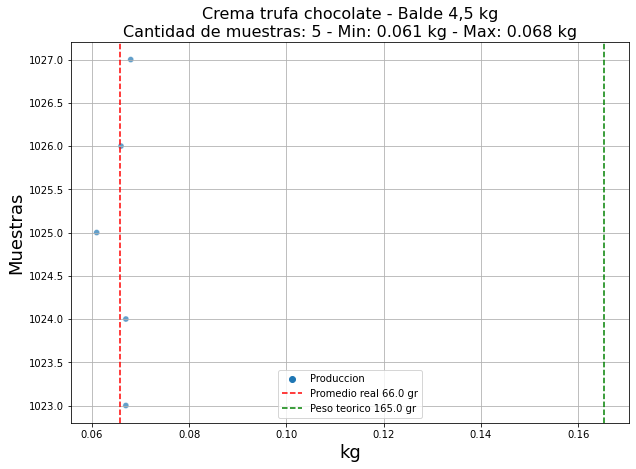

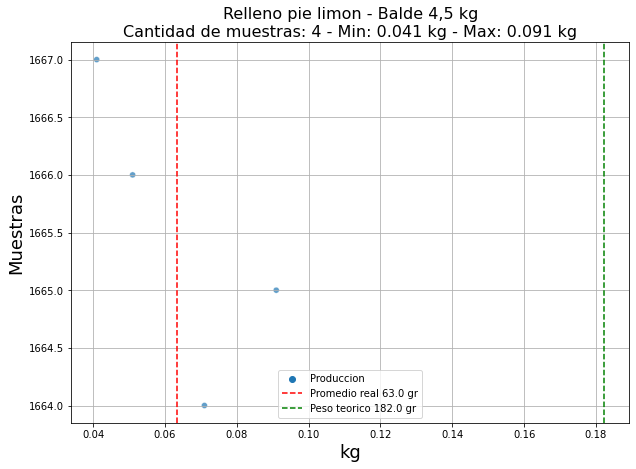

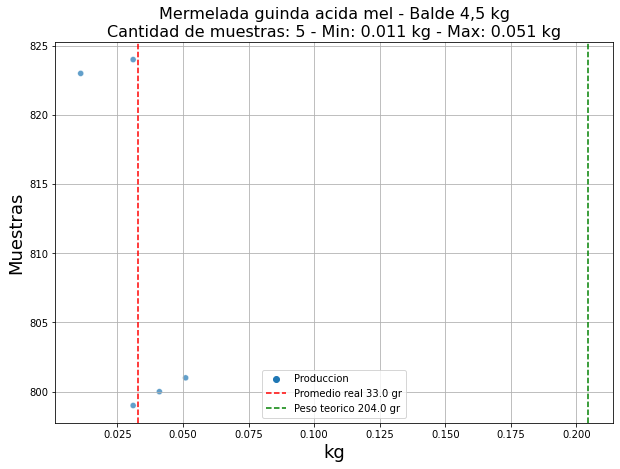

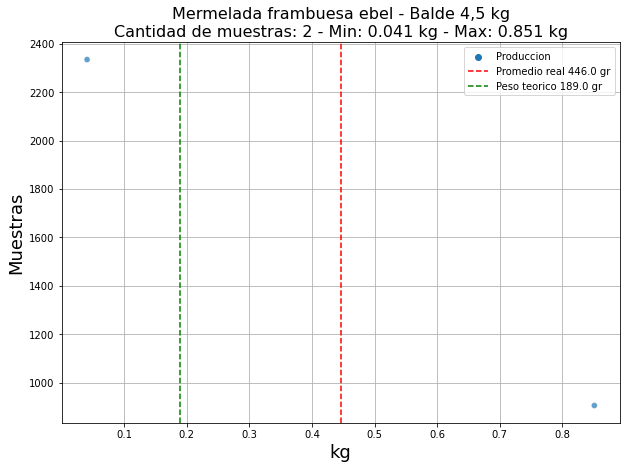

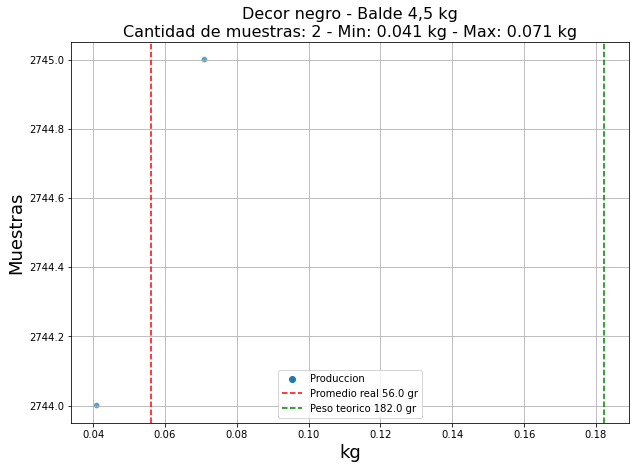

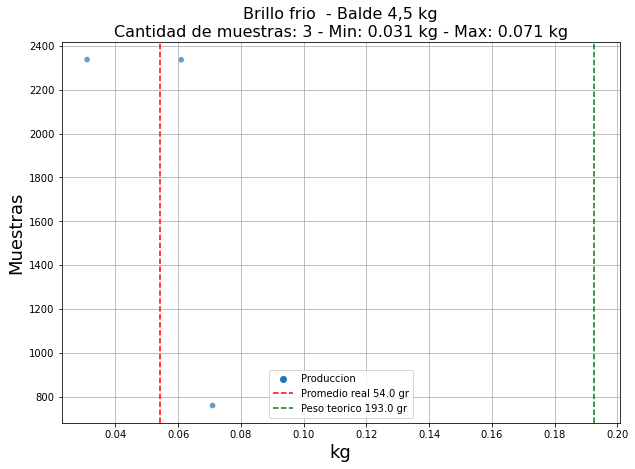

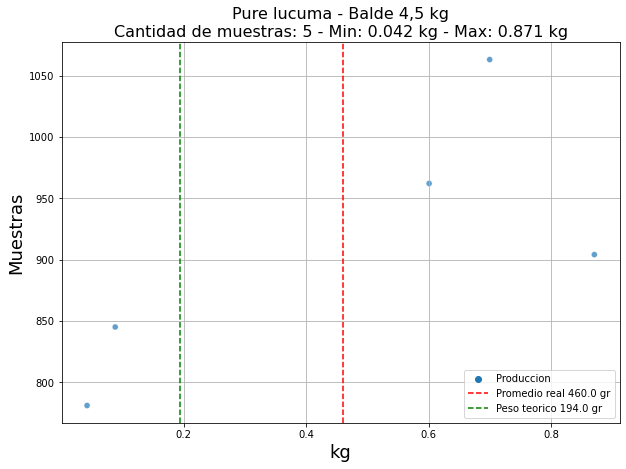

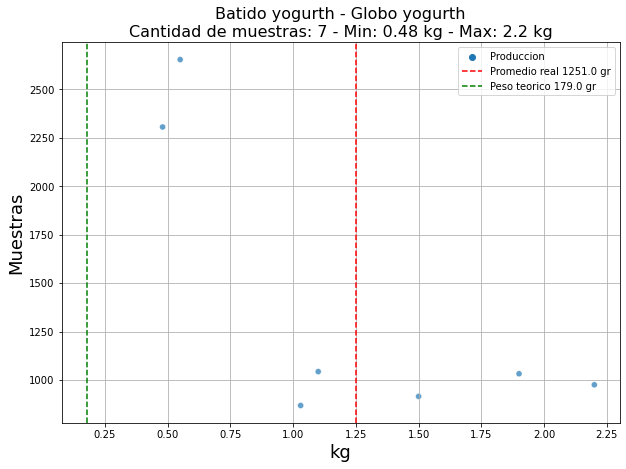

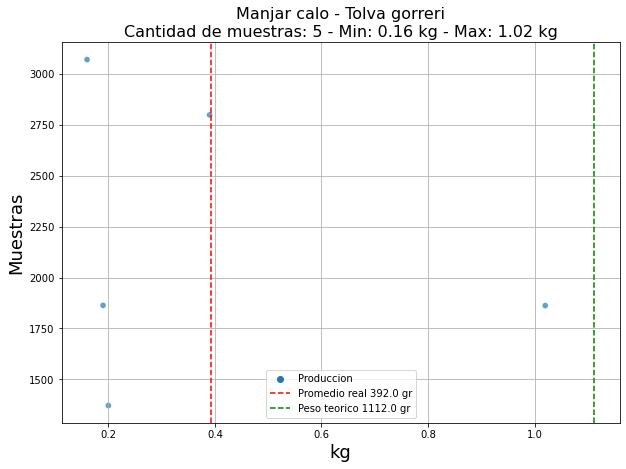

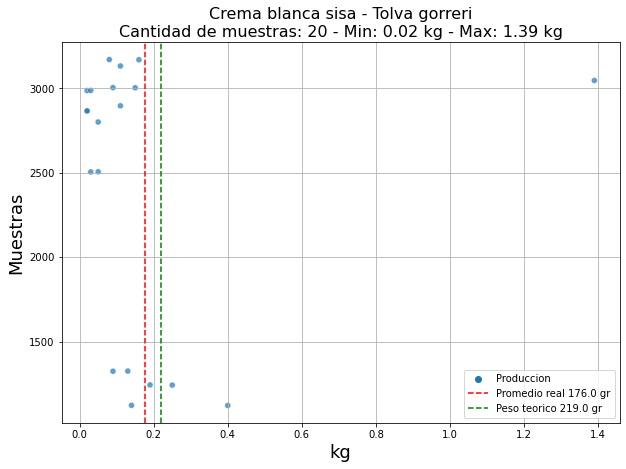

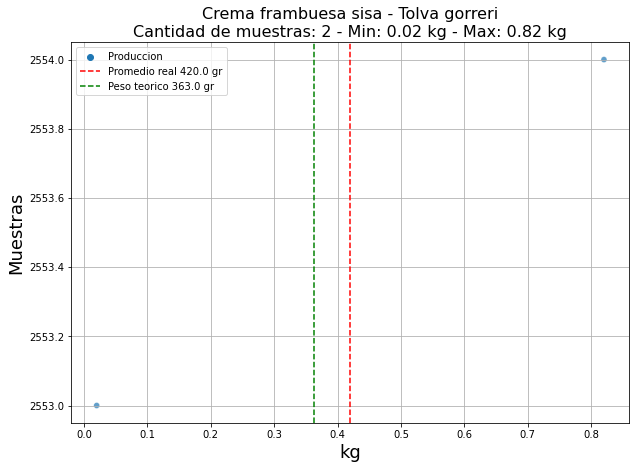

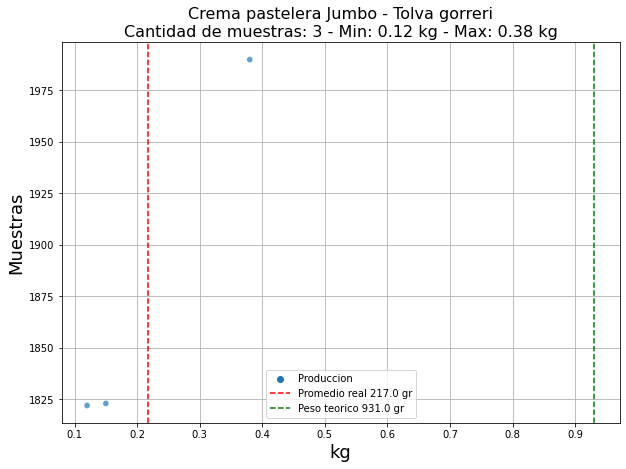

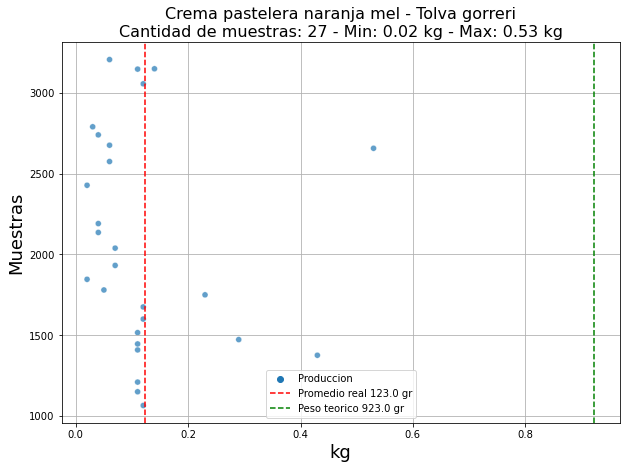

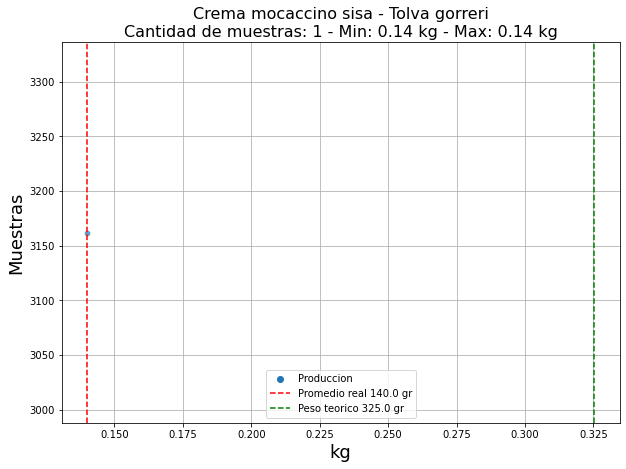

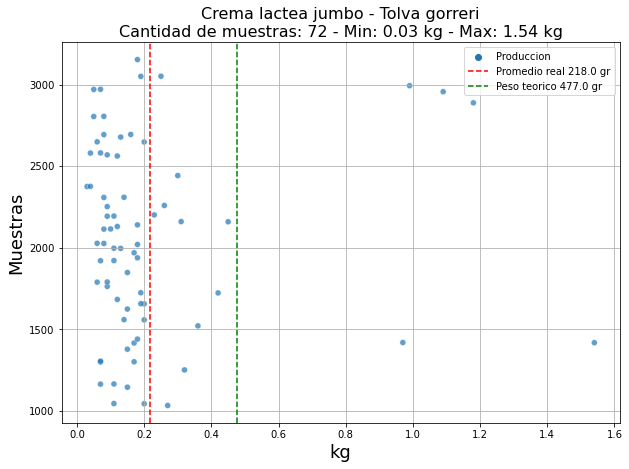

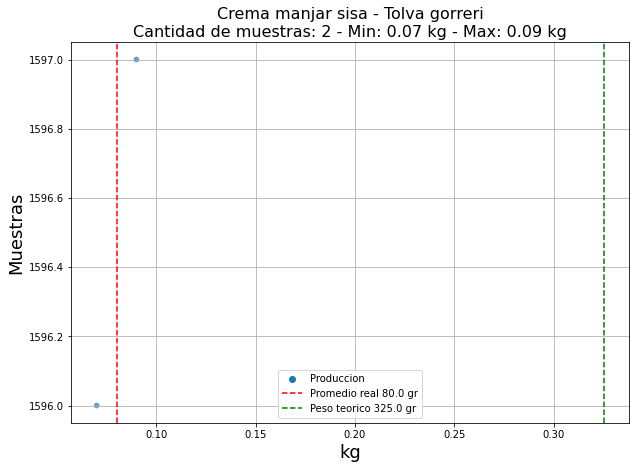

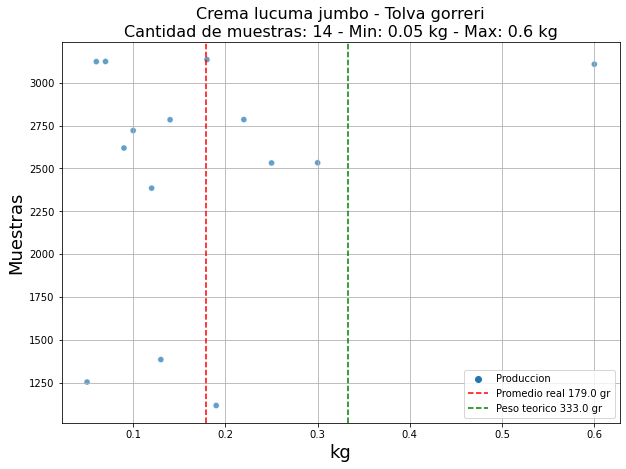

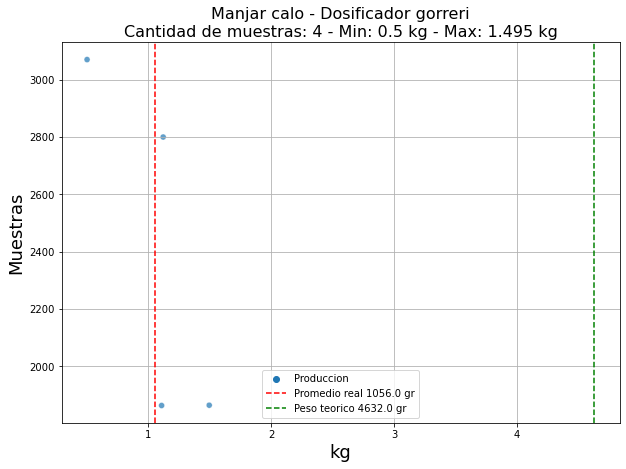

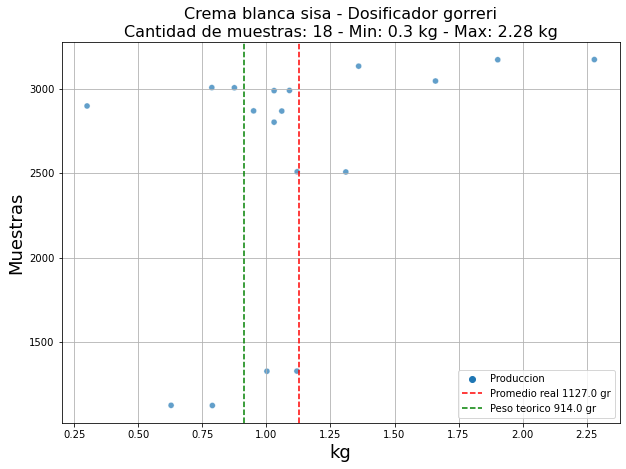

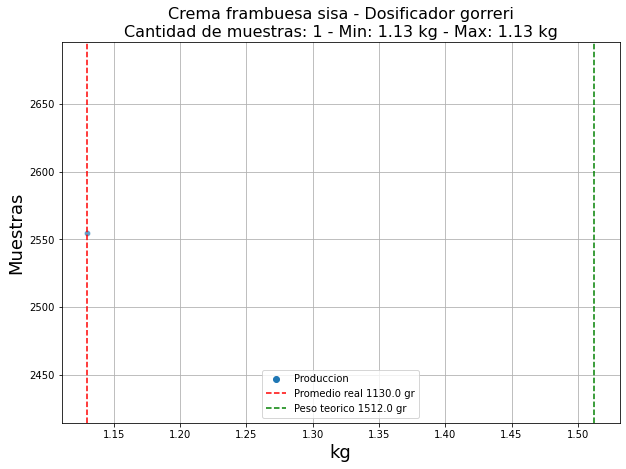

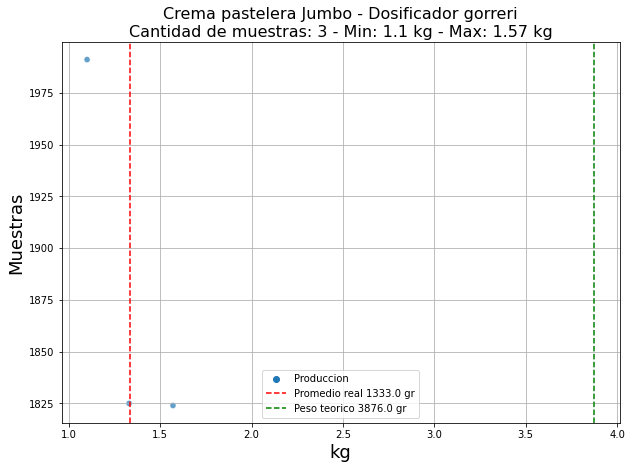

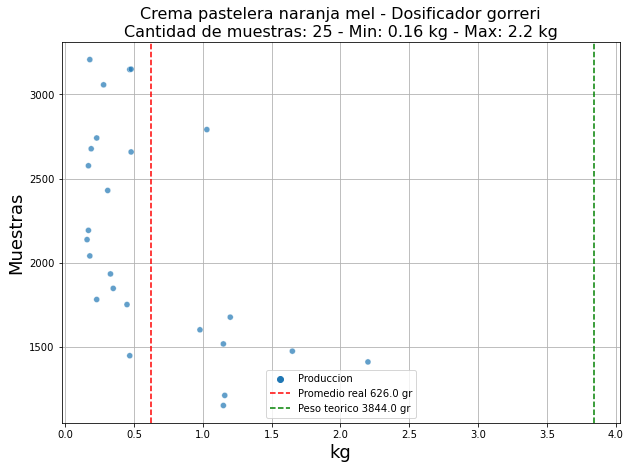

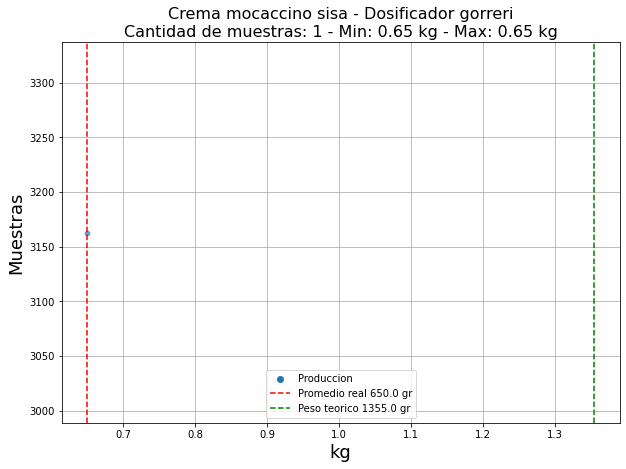

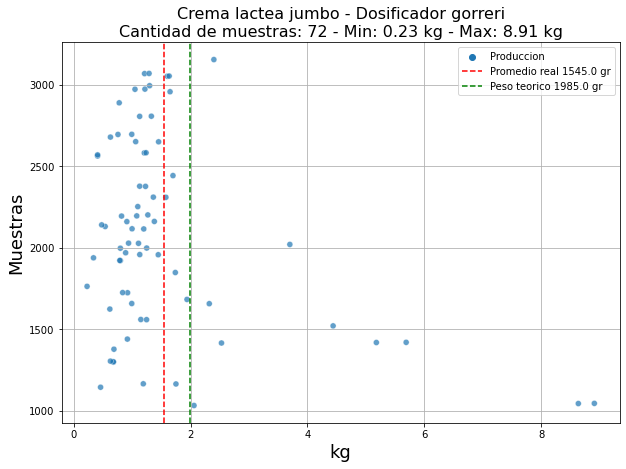

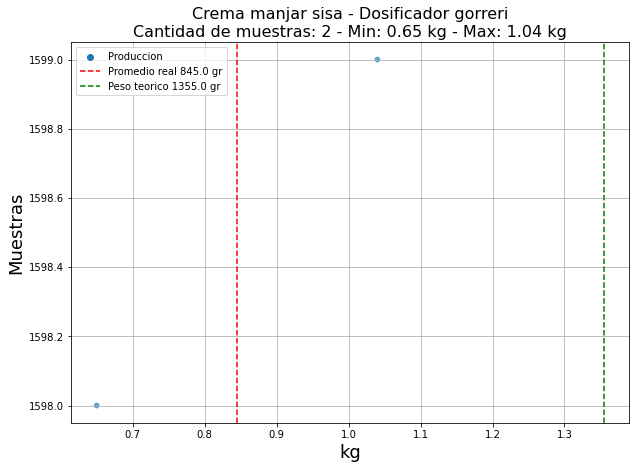

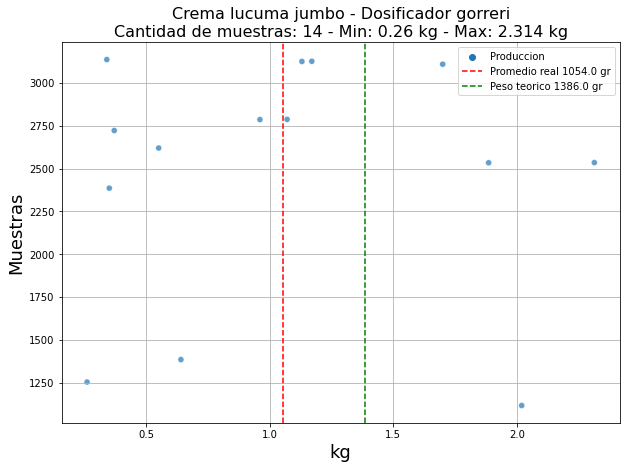

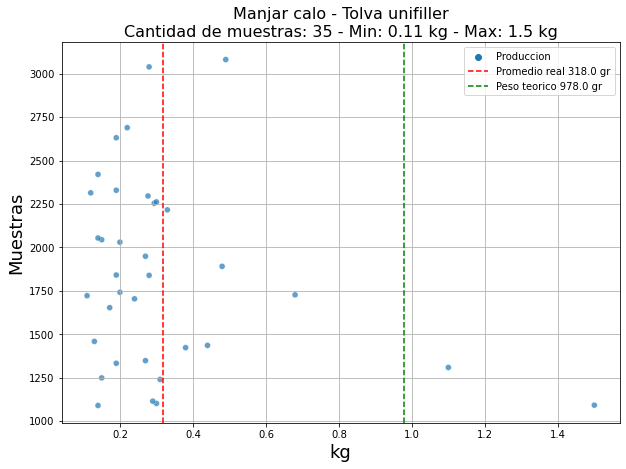

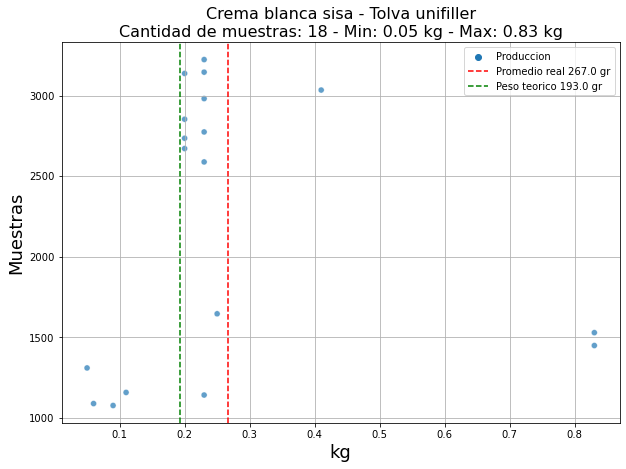

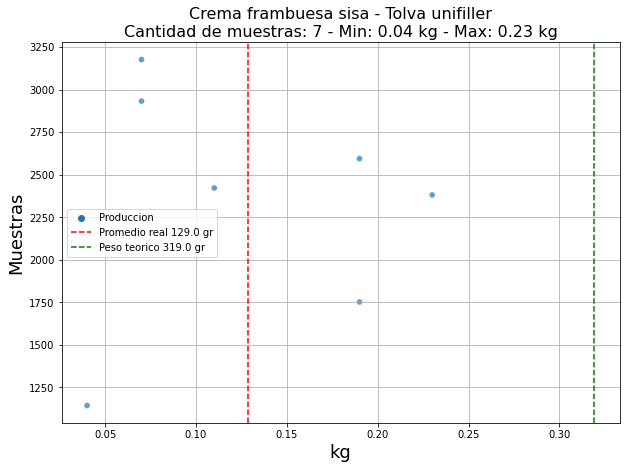

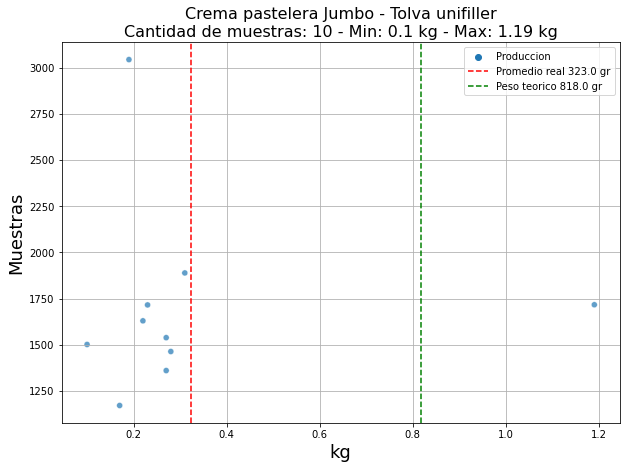

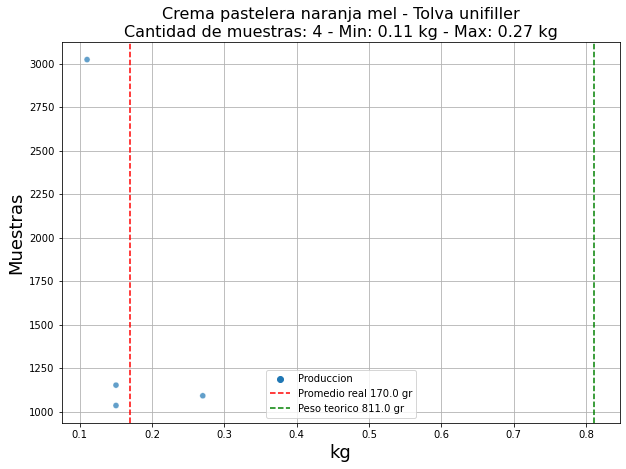

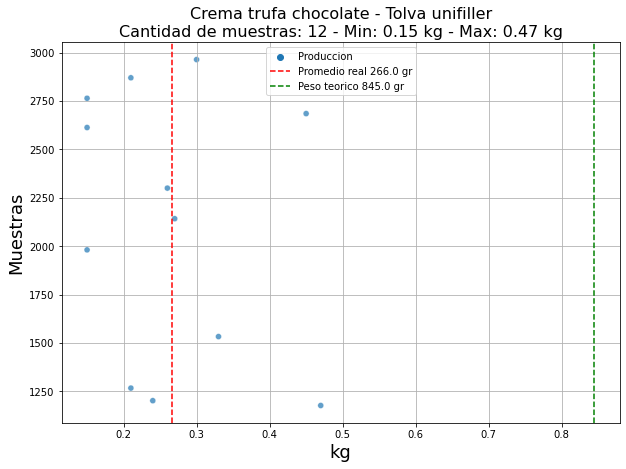

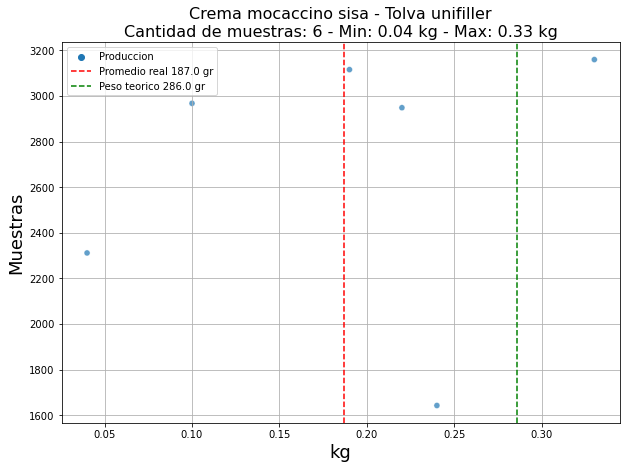

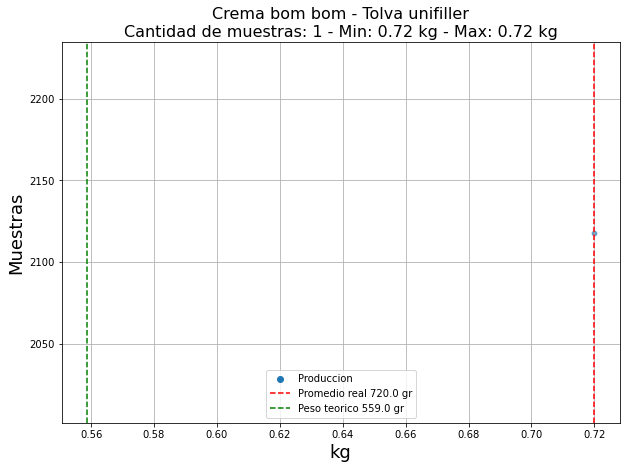

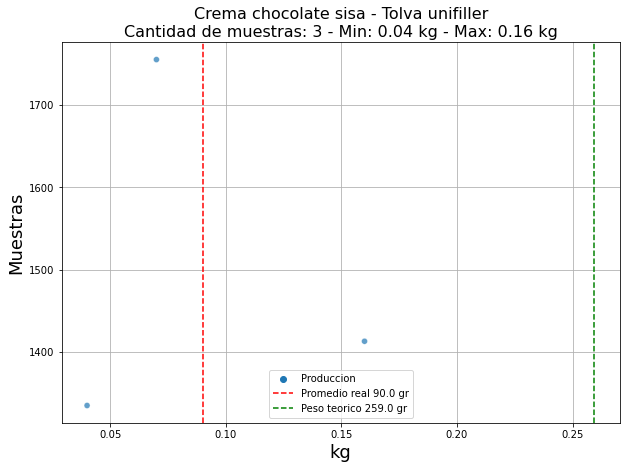

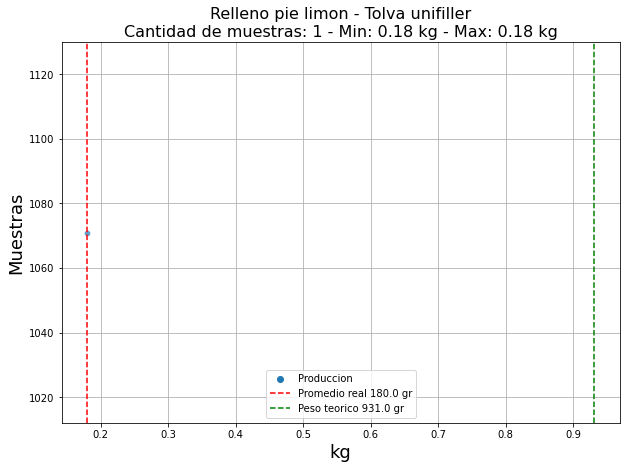

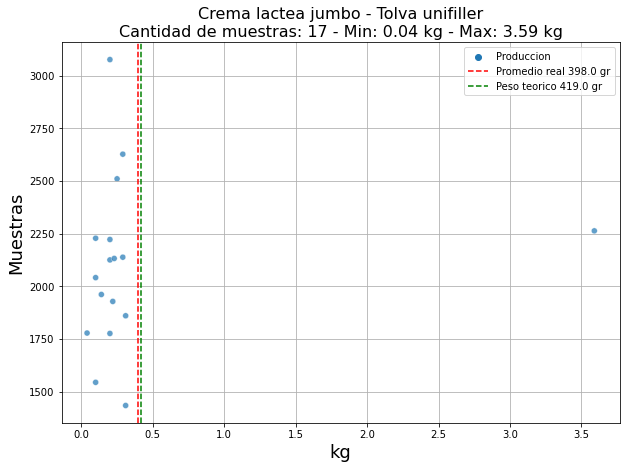

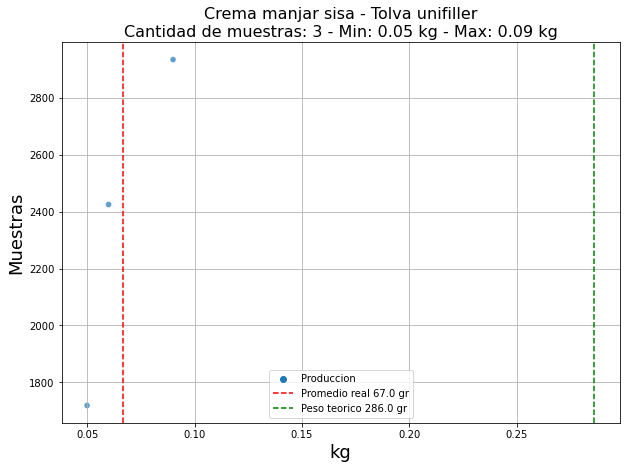

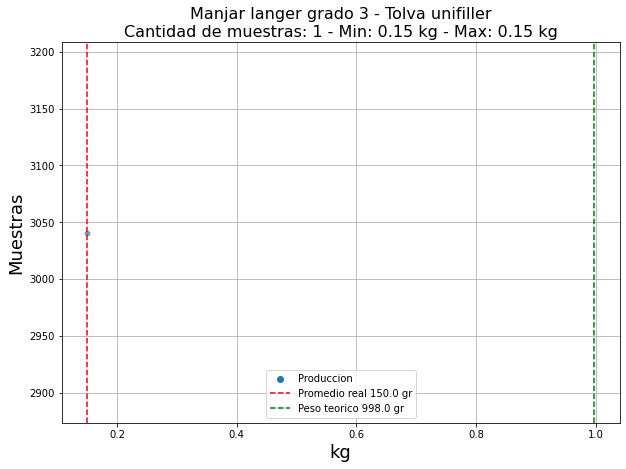

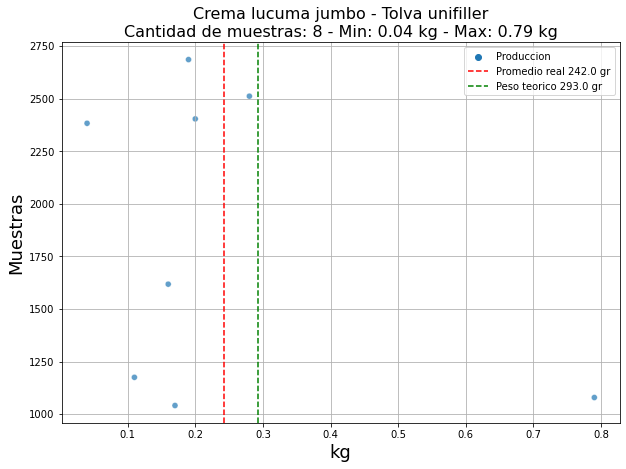

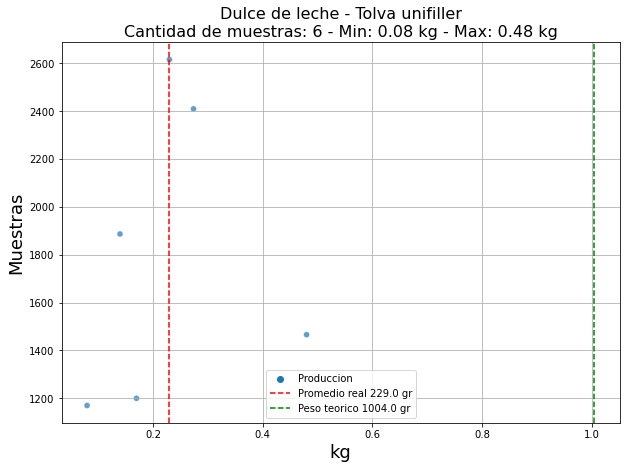

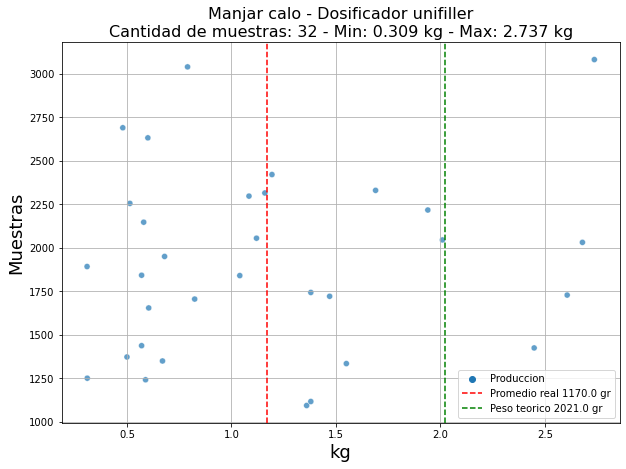

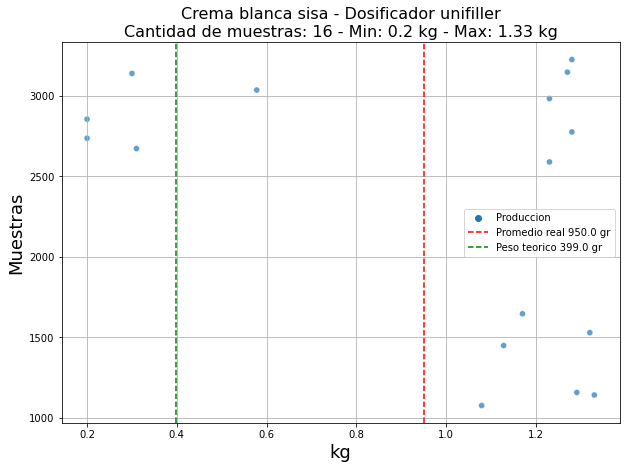

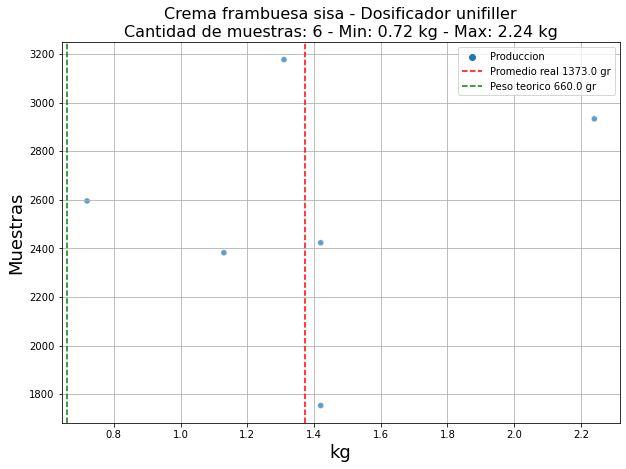

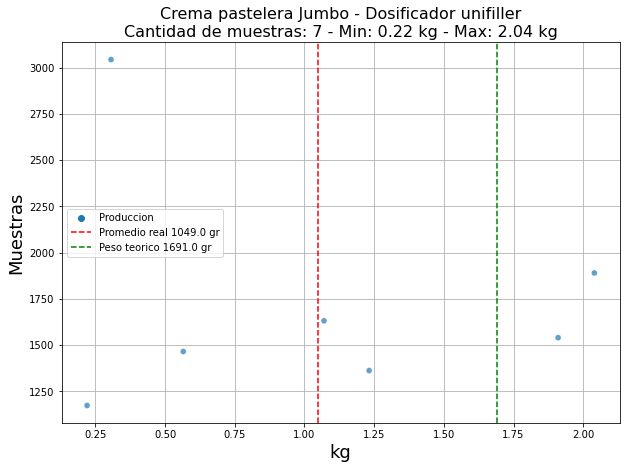

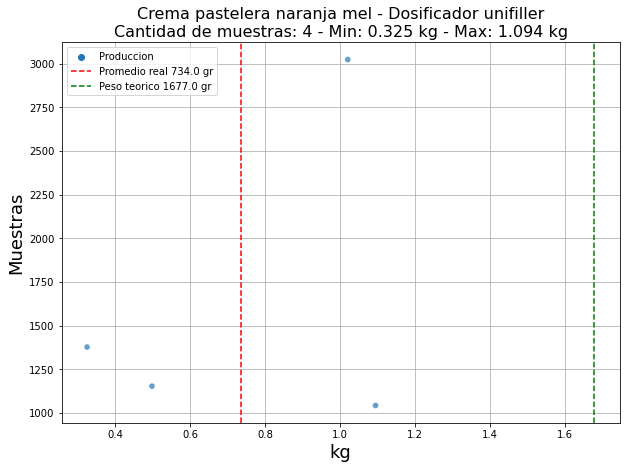

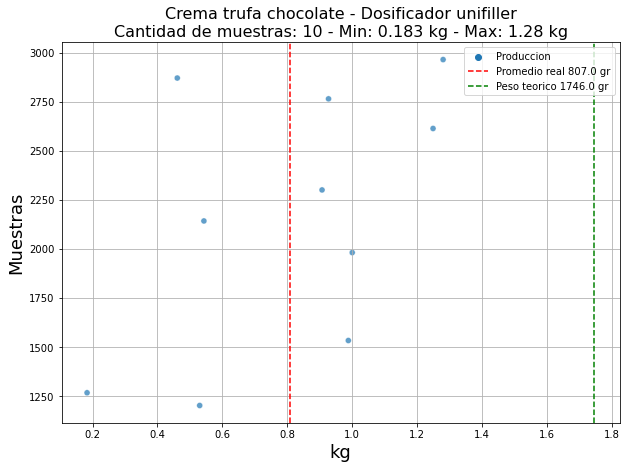

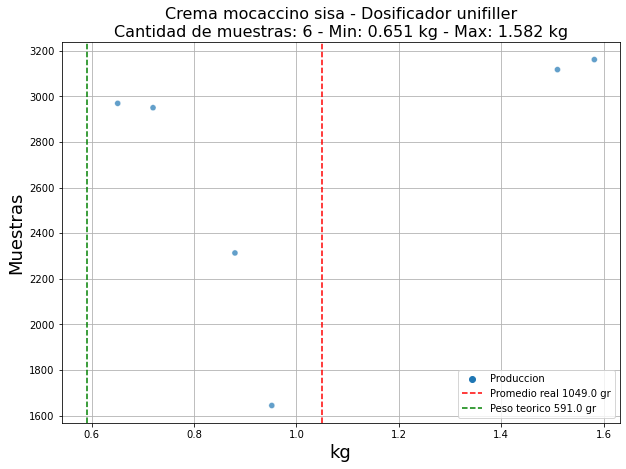

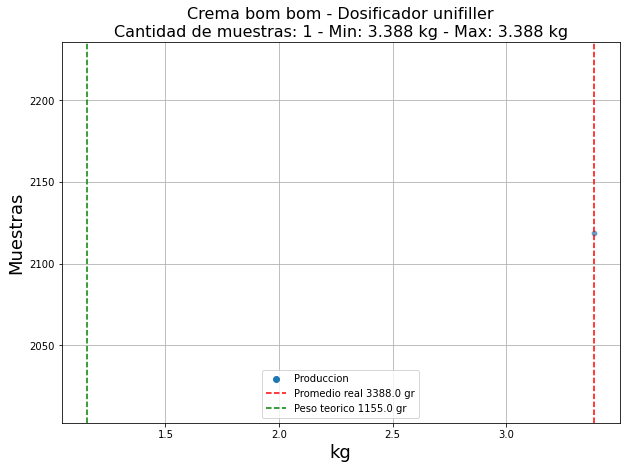

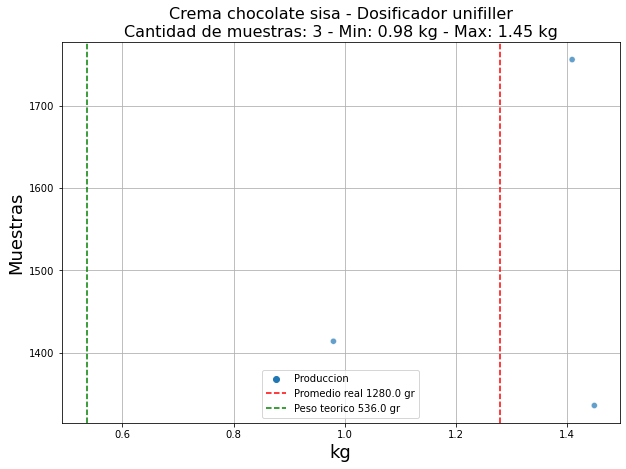

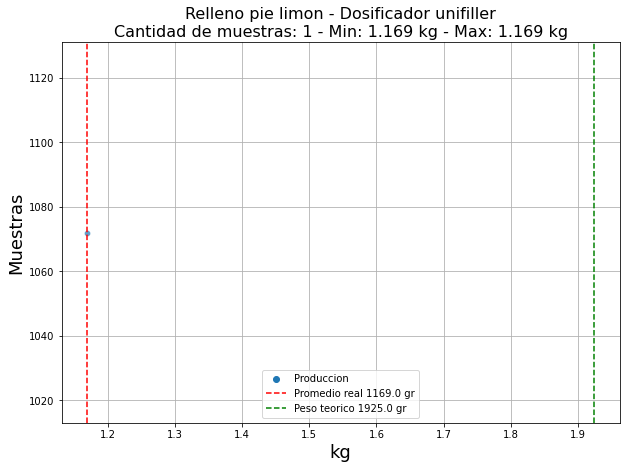

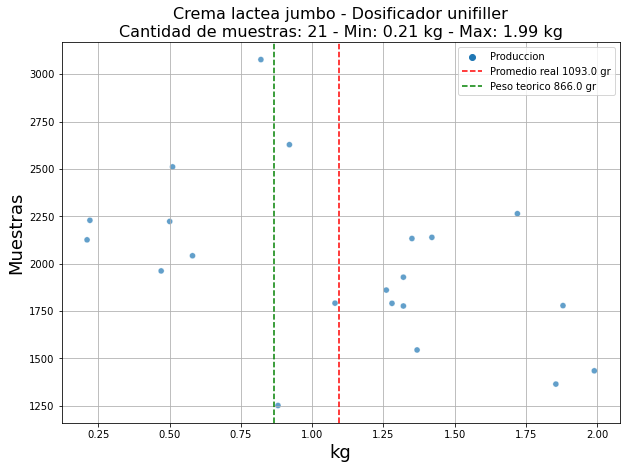

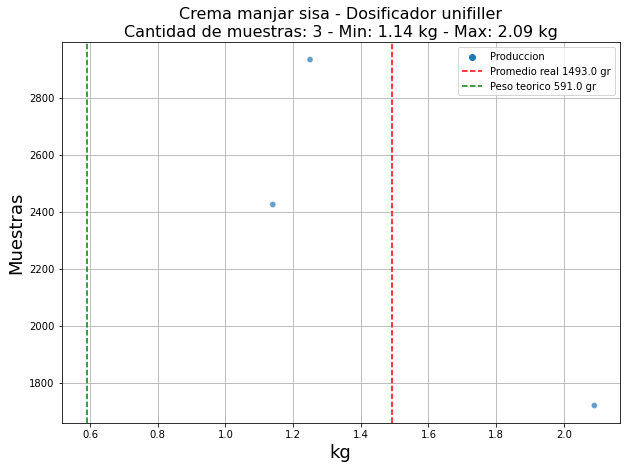

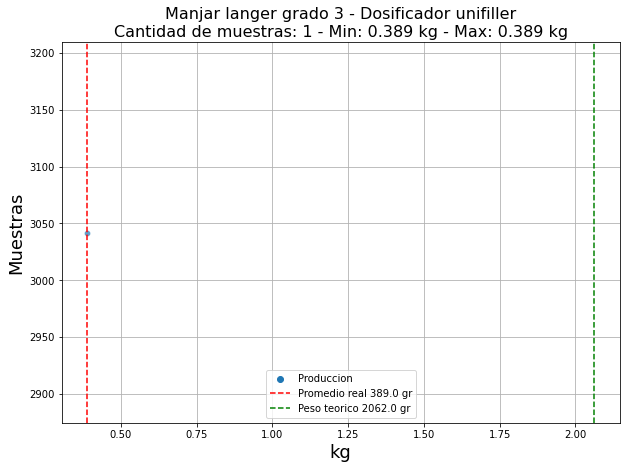

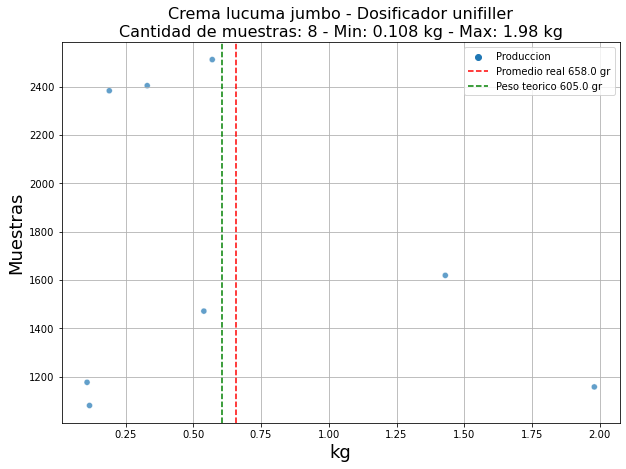

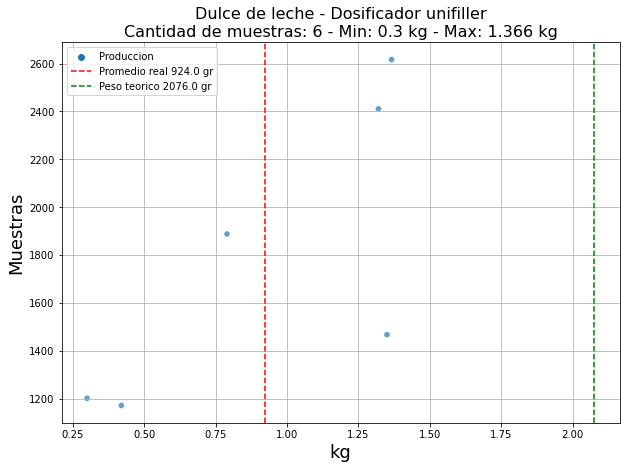

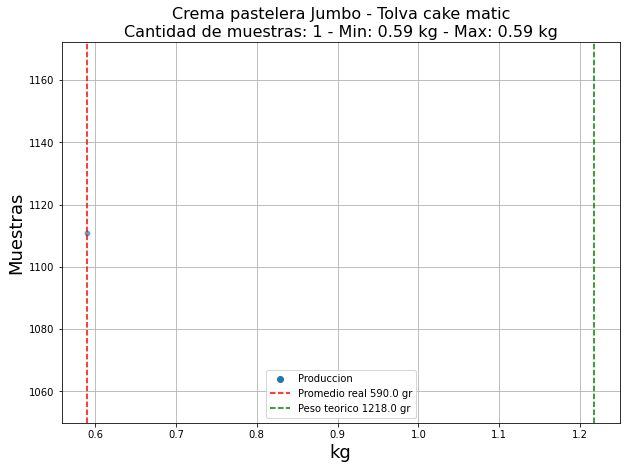

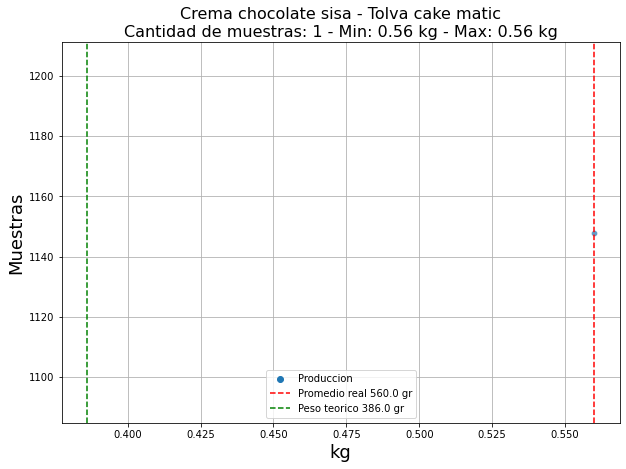

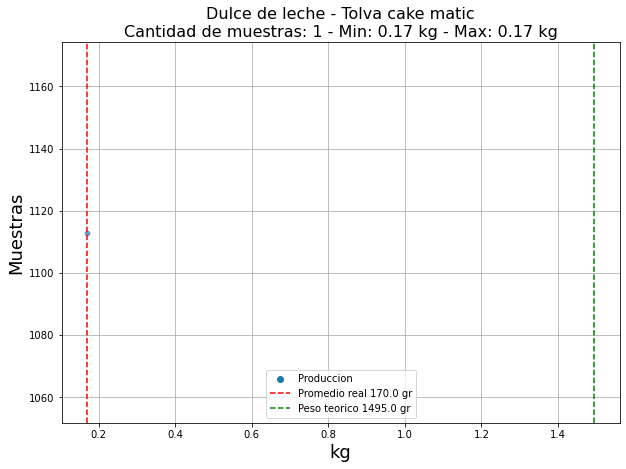

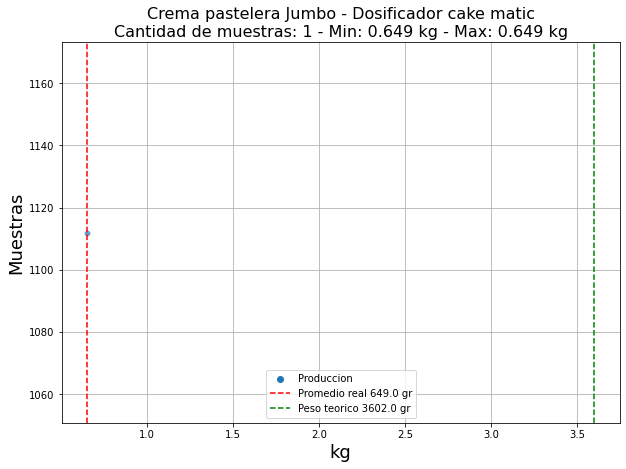

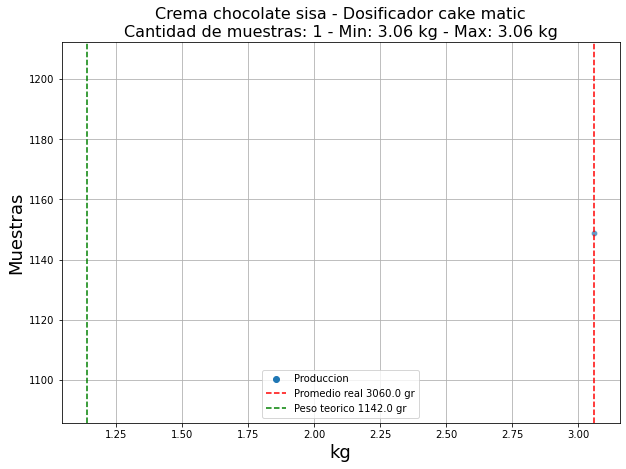

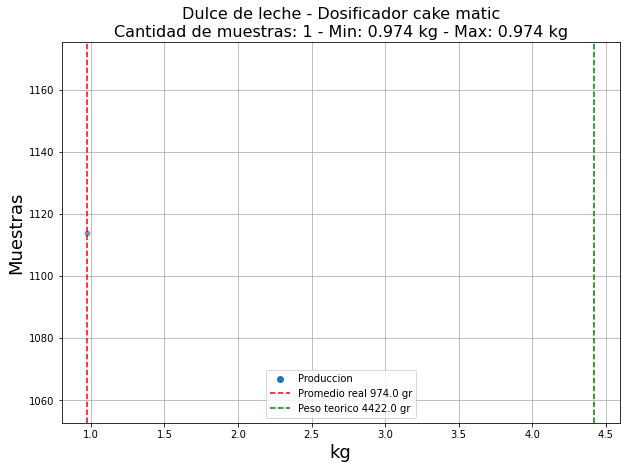

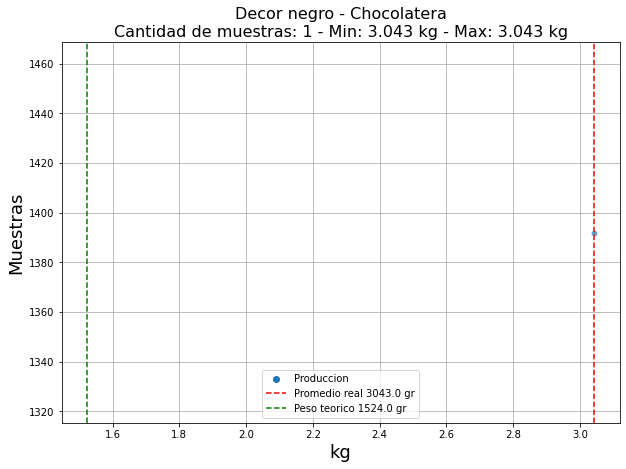

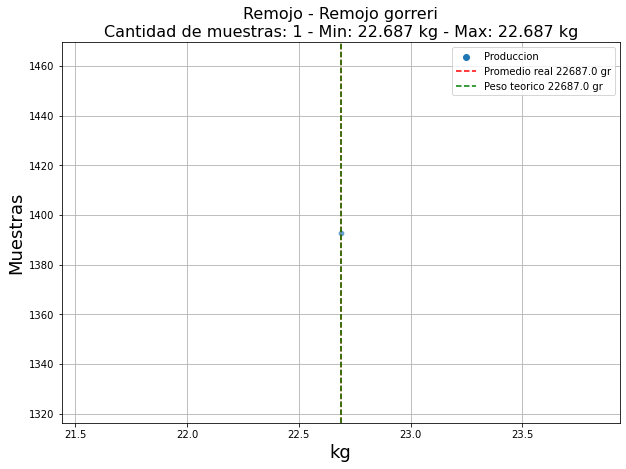

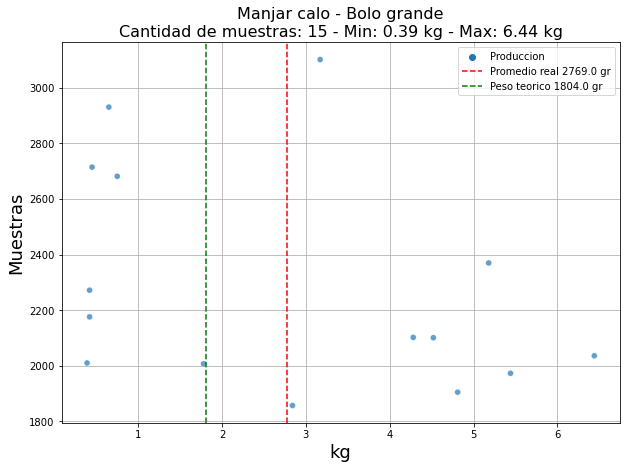

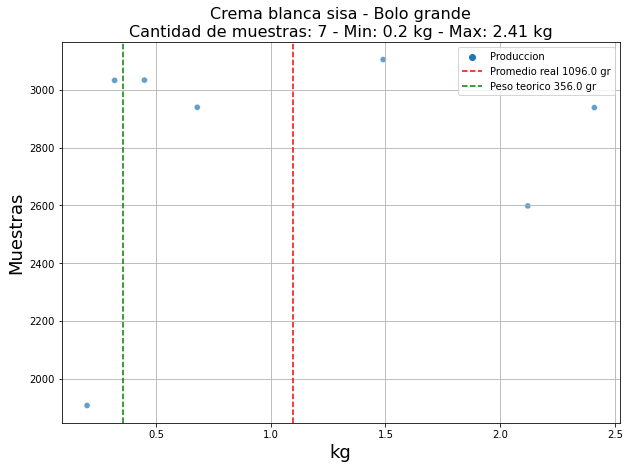

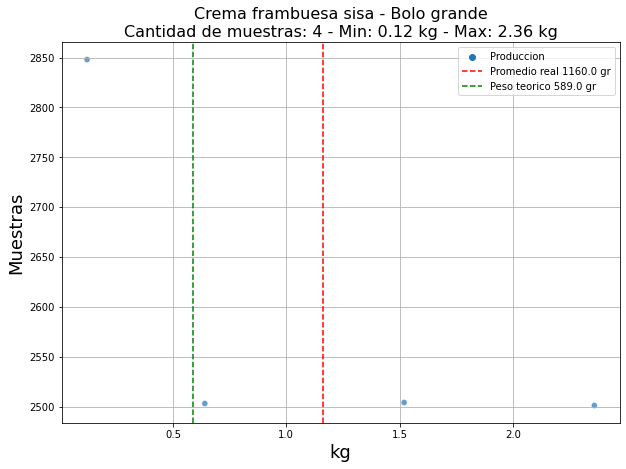

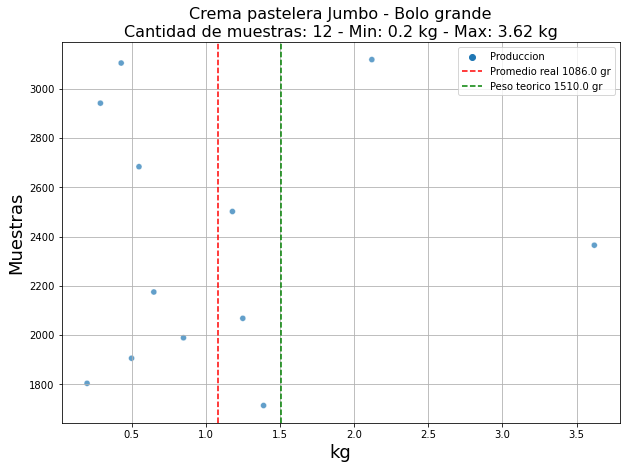

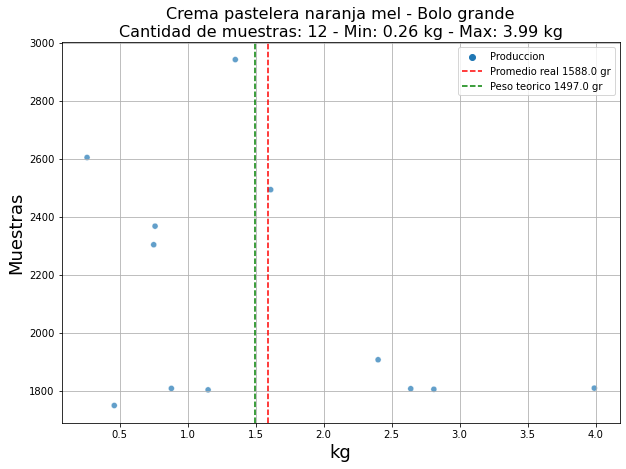

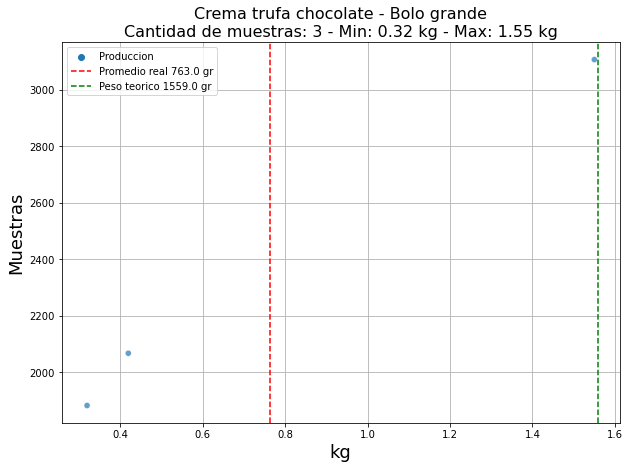

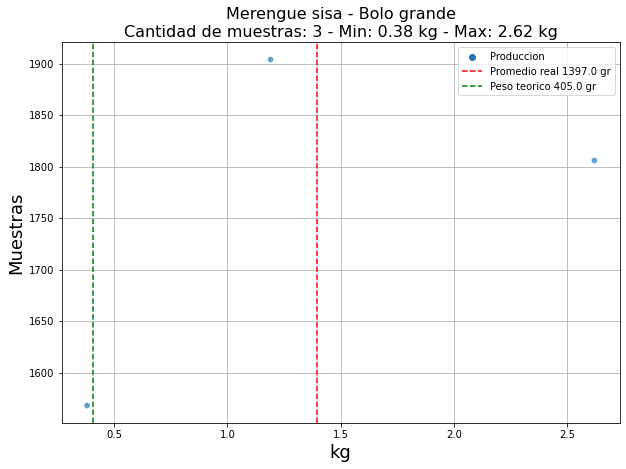

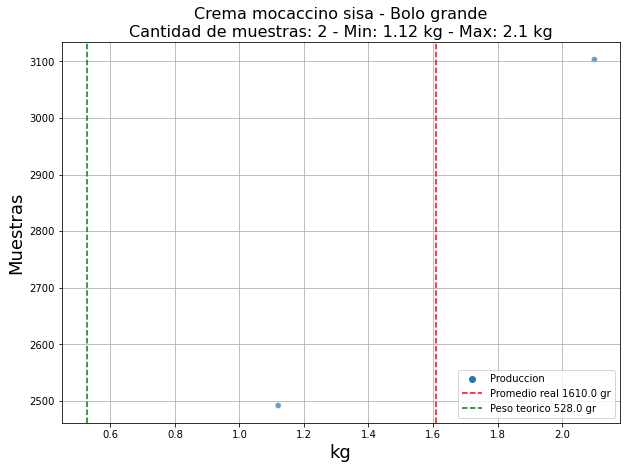

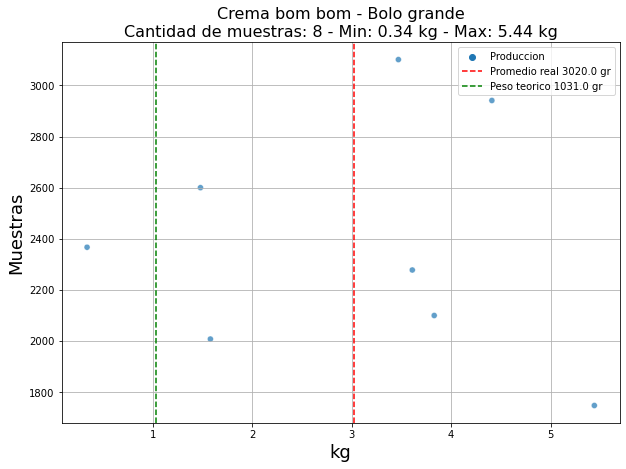

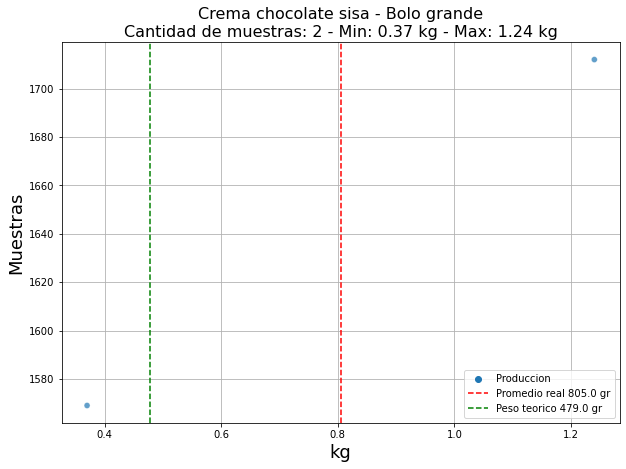

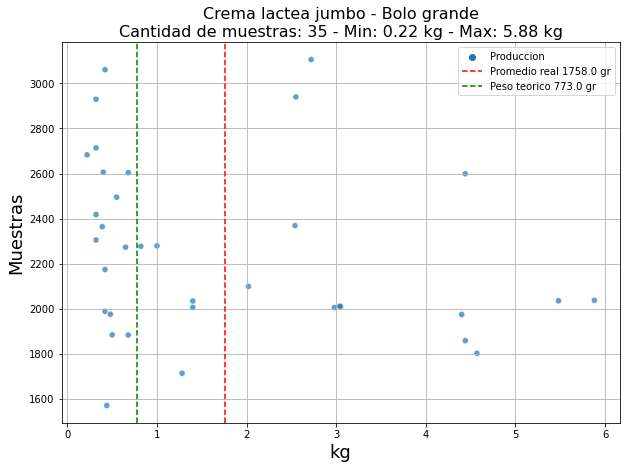

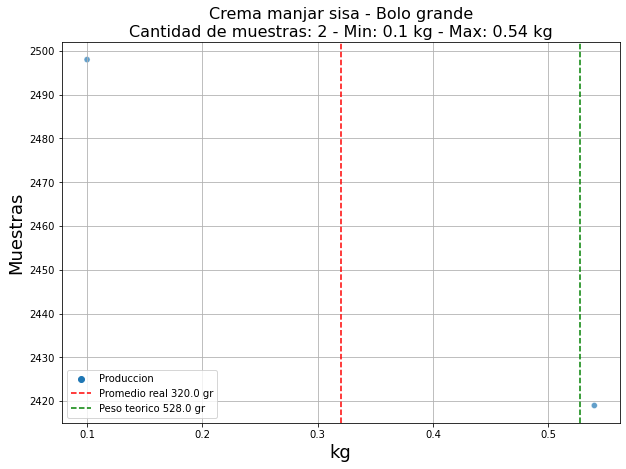

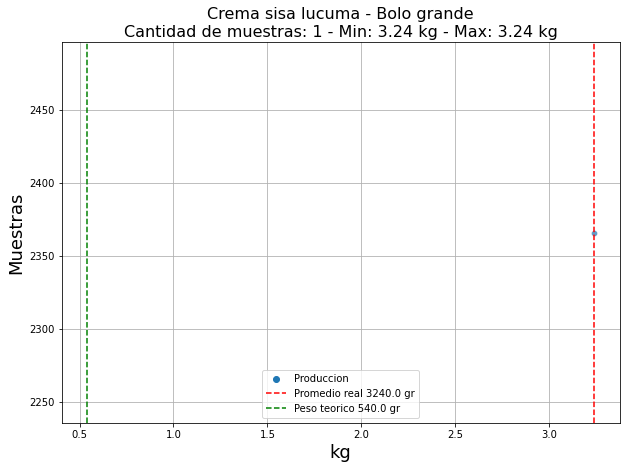

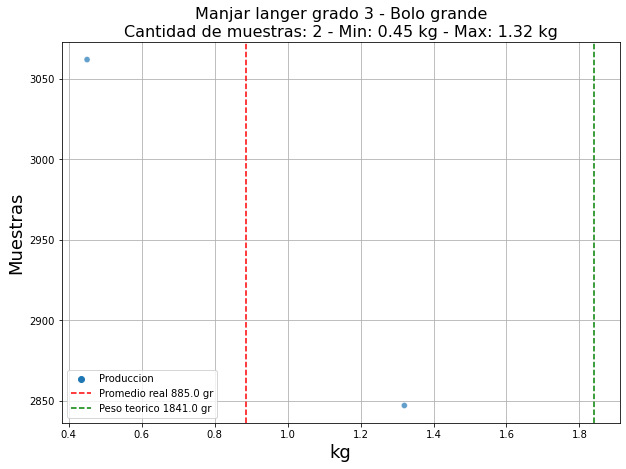

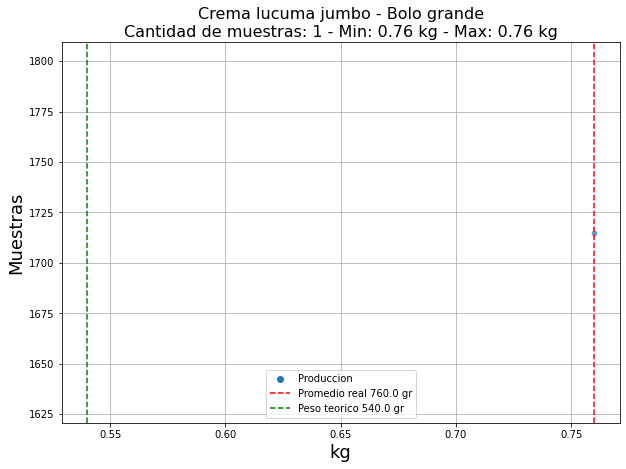

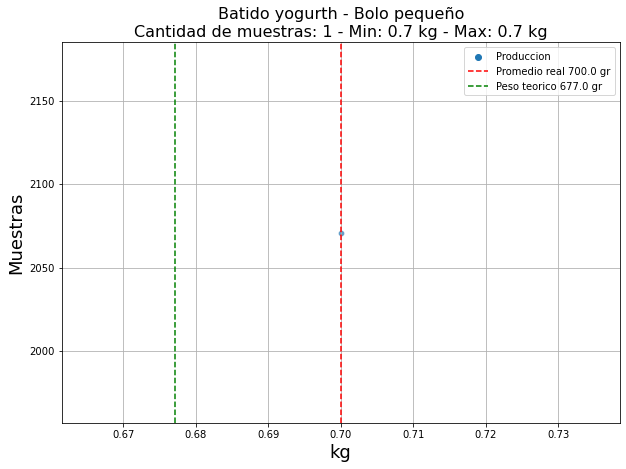

In [6]:
# Se crean todos los graficos segun las combinaciones ingresadas
contador = 0
for ut in utensilio:
    for mp in materia_prima:
        llv = mp+ut
        for lv in llave:
            if lv == llv:
                Grafico(df,ut,mp).graficar()
                plt.savefig(ut+'-'+mp+'.jpg',format='jpg')
                contador += 1
# Se agrega contador de graficos ejecutados, el cual debe cuadrar con cantidad de combinaciones                
print(contador)